In [1]:
//%jsroot on

In [2]:
//Q = (ma/mB− 1 )Ea + (mb/mB+ 1 )Eb −2cos(theta)*sqrt(ma*mb*Ea*Eb)/mB
//15C+p->d+14C      a=15C A=p b=d  B=14C
//ma=15.0105993 mb=2.01410177811 mB=14.003241988 Ea=27 MeV Eb_Etheta
//Q0=+1.01

In [3]:
#define _bin  50
#define _15C 28.3
#define _t0H2offset -1.25
#define _H2offset +0.0
#define _thetaoffset -0.
#define _ntarget 2.984e20
#define _n2target 7.174e20

In [4]:
Double_t deltaq=-0.004;
TH1D *q_allall=new TH1D("Ex_all","Ex_all",56,-6+deltaq,22+deltaq);
TH1D *q_allm=new TH1D("Ex_all","Ex_all",56,-6+deltaq,22+deltaq); 
TH1D *q_allmn=new TH1D("Ex_nt","Ex_nt",56,-6+deltaq,22+deltaq); 
TH1D *q_nt=new TH1D("Ex_all","Ex_all",40,-6,22); 
  TGraph *grate=new TGraph();
  TGraph *grate_654=new TGraph();
  TGraph *grate2=new TGraph();
  TGraph *grate2_1=new TGraph();
  TGraph *grate2_2=new TGraph();
  TGraph *grate2_all=new TGraph();
  TGraph *grate_mix=new TGraph();
Double_t temptheta,temprate,taa;
Int_t countrate=0,countrate_654=0;
ifstream inr("/home/zhuhy/JNBook/Experiment2022/taf/else/txt/15C_d_3He_cm_0_Daehnick_GDP08.txt");
  if(inr.is_open()){
    while(!inr.eof())
    {
      inr>>temptheta>>temprate>>taa;
      grate->SetPoint(countrate++,temptheta,temprate);
      //cout<<therunnumber<<'\t'<<accpttedrate[therunnumber]<<'\n';
    }
  }
  inr.close();
ifstream inr2("/home/zhuhy/JNBook/Experiment2022/taf/else/txt/15C_d_3He_cm_0654_Daehnick_GDP08.txt");
  if(inr2.is_open()){
    while(!inr2.eof())
    {
      inr2>>temptheta>>temprate>>taa;
      grate_654->SetPoint(countrate_654++,temptheta,temprate);
        //cout<<temptheta<<'\t'<<temprate*4<<'\n';
      //cout<<therunnumber<<'\t'<<accpttedrate[therunnumber]<<'\n';
    }
  }
  inr2.close();

Warning in <TROOT::Append>: Replacing existing TH1: Ex_all (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Ex_all (Potential memory leak).


In [5]:
Double_t mean[12],sigma[12],meanangle[12];
Double_t mean2[12],sigma2[12],meanangle2[12];
Double_t eoff[12]={-0.,-0.,0.,0.,   -0.,-0.,0.,0.,   0.,0.,0.,0.};
//Double_t eoffx2[12]={0.,0.,0.,0.,   0.0032,0.,0.,0.,   0.0032,0.,0.,0.};
Double_t eoffx2[12]={0.0004,0.,-0.004,0.0004,   0.0032,0.,0.,0.,   0.0008,0.,0.,0.};
//Double_t eoffx2[12]={0.0004,0.,0.0020,0.,   0.0004,0.,0.0015,0.0019,   0.0022,0.0015,0.0017,0.0015};
//double eoff[12]={-1.5,-1.5,-1,-1, -1,-1,0,0, -1,-1,-1.5,-1.5};
//Double_t theoff[12]={0.34,0.93,-0.5,-0.1+0.7,        -0.4,-0.7,0.5-0.7,-0.35,           1.2,1.44,0.8+0.5,0.95-0.5};
Double_t theoff[12]={0.34,0.93-0.2,-0.5-0.1,-0.1+0.5,        -0.4-0.2,-0.7,0.5-0.9,-0.35-0.3,           1.2-0.2,1.44,0.8+0.5,0.95-0.9};
for(Int_t ii=0;ii<12;ii++){
    theoff[ii]+=0.4;
    eoff[ii]+=0.;
    eoffx2[ii]+=0.0004;
}
for(Int_t ii=0;ii<12;ii++){
    if(ii%2==0)theoff[ii]+=0.1;
    if(ii%2==1)theoff[ii]-=0.1;
    
}
//double theoff[12]={0,0.5,0,0, -0.5,-0.5,0,-0.5, 1.,0,0.5,1.5};
TF1 *g1 = new TF1("g1","gaus");

In [6]:
Double_t anglemax_0=0,anglemax_654=0;

Double_t Q,Ex,Theta;
Int_t i;
TGraph *T1Etheta_B14He3_0= new TGraph;
Double_t Ex_0=0;
    for(Ex=0;Ex<200;Ex=Ex+0.1){
        for(Theta=0;Theta<50;Theta=Theta+0.01){
    Q=-15.59-((15.0106/14.0254-1.)*(_15C*15)+(3.01603/14.0254+1.)*Ex
       -2.*cos(Theta*3.14159/180.)*sqrt(15.0106*3.01603*_15C*15*Ex)/14.025404);
        if(fabs(Q-Ex_0)<0.001){
            T1Etheta_B14He3_0->SetPoint(i++,Theta,Ex);
            if(Theta>anglemax_0)anglemax_0=Theta;
        }
    }
  }


TGraph *T1Etheta_B14He3_654= new TGraph;
Double_t Ex_654=0.74;
  for(Ex=0;Ex<200;Ex=Ex+0.1){
        for(Theta=0;Theta<50;Theta=Theta+0.01){
    Q=-15.59-((15.0106/14.0254-1.)*(_15C*15)+(3.01603/14.0254+1.)*Ex
       -2.*cos(Theta*3.14159/180.)*sqrt(15.0106*3.01603*_15C*15*Ex)/14.025404);
        if(fabs(Q-Ex_654)<0.001){
            T1Etheta_B14He3_654->SetPoint(i++,Theta,Ex);
            if(Theta>anglemax_654)anglemax_654=Theta;
        }
    }
  }
cout<<"anglemax_0="<<anglemax_0<<'\t'<<"anglemax_654="<<anglemax_654<<'\n';
/*


TGraph *T1Etheta_B14He3_1860= new TGraph;
Double_t Ex_1860=1.86;
  for(Theta=0;Theta<50;Theta=Theta+0.2){
    for(Ex=0;Ex<200;Ex=Ex+0.001){
    Q=-15.59-((15.0106/14.0254-1.)*(_15C*15)+(3.01603/14.0254+1.)*Ex
       -2.*cos(Theta*3.14159/180.)*sqrt(15.0106*3.01603*_15C*15*Ex)/14.025404);
    if(abs(Q-Ex_1860)<0.01)T1Etheta_B14He3_1860->SetPoint(i++,Theta,Ex);
    }
  }

TGraph *T1Etheta_B14He3_4500= new TGraph;
Double_t Ex_4500=4.5;
  for(Theta=0;Theta<50;Theta=Theta+0.2){
    for(Ex=0;Ex<200;Ex=Ex+0.001){
    Q=-15.59-((15.0106/14.0254-1.)*(_15C*15)+(3.01603/14.0254+1.)*Ex
       -2.*cos(Theta*3.14159/180.)*sqrt(15.0106*3.01603*_15C*15*Ex)/14.025404);
    if(abs(Q-Ex_4500)<0.01)T1Etheta_B14He3_4500->SetPoint(i++,Theta,Ex);
    }
  }
*/

Int_t ii0=0;

anglemax_0=41.28	anglemax_654=40.74


In [7]:
TCanvas *c1=new TCanvas("c1","c1",1200,1500);
TCanvas *c2=new TCanvas("c2","c2");
TCanvas *c3=new TCanvas("c3","c3",1200,600);
TCanvas *c4=new TCanvas("c4","c4",1200,600);
TCanvas *c5=new TCanvas("c5","c5",600,800);

In [8]:
TGraph *count_out_0= new TGraph;
TGraph *solid_out_0= new TGraph;
TGraph *cross_out_0= new TGraph;
Int_t allcount_out_0=0;
Int_t allsolid_out_0=0;
Int_t allcross_out_0=0;
Int_t crosscount_out_0[50];
for(Int_t ii=0;ii<15;ii++){
    crosscount_out_0[ii]=0;   
}

In [9]:
void mergeGraphs(TGraph* sourceGraph, TGraph* destinationGraph) {
    for (int i = 0; i < sourceGraph->GetN(); i++) {
        double xSource = sourceGraph->GetX()[i];
        double ySource = sourceGraph->GetY()[i];

        bool isDuplicate = false;
        for (int j = 0; j < destinationGraph->GetN(); j++) {
            double xDest = destinationGraph->GetX()[j];
            double yDest = destinationGraph->GetY()[j];

            if (fabs(xSource - xDest) < 0.01 && fabs(ySource - yDest) < 0.01) {
                isDuplicate = true;
                break;
            }
        }

        if (!isDuplicate) {
            if(xSource>100)xSource-=100;
            destinationGraph->SetPoint(destinationGraph->GetN(), xSource, ySource);
        }
    }
}

In [10]:
void mergeGraphsoffset(TGraph* sourceGraph, TGraph* destinationGraph,TGraph* destinationGraph2,int ii) {
    Int_t tempkey;
    for (int i = 0; i < sourceGraph->GetN(); i++) {
        double xSource = sourceGraph->GetX()[i];
        double ySource = sourceGraph->GetY()[i];
        ySource=ySource-ySource*ySource*eoffx2[ii];
            tempkey=0;
            if(xSource>100){xSource-=100;tempkey=10;}

        bool isDuplicate = false;
        for (int j = 0; j < destinationGraph->GetN(); j++) {
            double xDest = destinationGraph->GetX()[j];
            double yDest = destinationGraph->GetY()[j];

            if (fabs(xSource - xDest) < 0.01 && fabs(ySource - yDest) < 0.01) {
                isDuplicate = true;
                break;
            }
        }

        if (!isDuplicate) {
            if(ii<100){
                ySource=ySource-0.;
                destinationGraph->SetPoint(destinationGraph->GetN(), xSource+theoff[ii], ySource+0.);
                destinationGraph2->SetPoint(destinationGraph->GetN(), tempkey, ySource+0.);
                //cout<<ii<<'\t'<<xSource+theoff[ii]<<'\t'<<theoff[ii]<<'\n';
            }
            if(ii>=100){
                ySource-=0.;
                if(ySource>23)continue;
                i=i%100;
                destinationGraph->SetPoint(destinationGraph->GetN(), xSource+(theoff[ii]+theoff[ii+1])/2., ySource+0.);
                destinationGraph2->SetPoint(destinationGraph->GetN(), tempkey, ySource+0.);
                
                //cout<<"**"<<ii<<'\t'<<xSource+(theoff[ii]+theoff[ii+1])/2<<'\t'<<ySource<<'\n';
            }
        }
    }
}

In [11]:
TGraph *T1E_newtheta_new_bydstar_0At= new TGraph;
TGraph *T1E_newtheta_new_bydstar_0Bt= new TGraph;
TGraph *T1E_newtheta_new_bydstar_1At= new TGraph;
TGraph *T1E_newtheta_new_bydstar_1Bt= new TGraph;
TGraph *T1E_newtheta_new_bydstar_2At= new TGraph;
TGraph *T1E_newtheta_new_bydstar_2Bt= new TGraph;
TGraph *T1E_newtheta_new_bydstar_3At= new TGraph;
TGraph *T1E_newtheta_new_bydstar_3Bt= new TGraph;
TGraph *T1E_newtheta_new_bydstar_4At= new TGraph;
TGraph *T1E_newtheta_new_bydstar_5At= new TGraph;
TGraph *T1E_newtheta_new_bydstar_5Bt= new TGraph;
TGraph *T1E_newtheta_new_bydstar_allt= new TGraph;
TGraph *T1E_newtheta_new_bydstar_allt2= new TGraph;
TString fileName_0At = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/talltt_new14B_small_3He_all_taf_ad0_ac0A_theta_delay_tarloss.root");
TString fileName_0Bt = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/alltt_new14B_small_3He_all_taf_ad0_ac0B_theta_delay_tarloss.root");
TString fileName_1At = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/talltt_new14B_small_3He_all_taf_ad1_ac1A_theta_delay_tarloss.root");
TString fileName_1Bt = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/alltt_new14B_small_3He_all_taf_ad1_ac1B_theta_delay_tarloss.root");
TString fileName_2At = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/talltt_new14B_small_3He_all_taf_ad2_ac2A_theta_delay_tarloss.root");
TString fileName_2Bt = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/alltt_new14B_small_3He_all_taf_ad2_ac2B_theta_delay_tarloss.root");
TString fileName_3At = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/talltt_new14B_small_3He_all_taf_ad3_ac3A_theta_delay_tarloss.root");
TString fileName_3Bt = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/alltt_new14B_small_3He_all_taf_ad3_ac3B_theta_delay_tarloss.root");
TString fileName_4At = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/talltt_new14B_small_3He_all_taf_ad4_ac4A_theta_delay_tarloss.root");
TString fileName_5At = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/talltt_new14B_small_3He_all_taf_ad5_ac5A_theta_delay_tarloss.root");
TString fileName_5Bt = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/alltt_new14B_small_3He_all_taf_ad5_ac5B_theta_delay_tarloss.root");

TFile *ipf_0At = new TFile(fileName_0At.Data(),"read");
TFile *ipf_0Bt = new TFile(fileName_0Bt.Data(),"read");
TFile *ipf_1At = new TFile(fileName_1At.Data(),"read");
TFile *ipf_1Bt = new TFile(fileName_1Bt.Data(),"read");
TFile *ipf_2At = new TFile(fileName_2At.Data(),"read");
TFile *ipf_2Bt = new TFile(fileName_2Bt.Data(),"read");
TFile *ipf_3At = new TFile(fileName_3At.Data(),"read");
TFile *ipf_3Bt = new TFile(fileName_3Bt.Data(),"read");
TFile *ipf_4At = new TFile(fileName_4At.Data(),"read");
TFile *ipf_5At = new TFile(fileName_5At.Data(),"read");
TFile *ipf_5Bt = new TFile(fileName_5Bt.Data(),"read");
TCanvas *T1Etheta_new_0At=(TCanvas *)ipf_0At->Get("T1Etheta_new");
TCanvas *T1Etheta_new_0Bt=(TCanvas *)ipf_0Bt->Get("T1Etheta_new");
TCanvas *T1Etheta_new_1At=(TCanvas *)ipf_1At->Get("T1Etheta_new");
TCanvas *T1Etheta_new_1Bt=(TCanvas *)ipf_1Bt->Get("T1Etheta_new");
TCanvas *T1Etheta_new_2At=(TCanvas *)ipf_2At->Get("T1Etheta_new");
TCanvas *T1Etheta_new_2Bt=(TCanvas *)ipf_2Bt->Get("T1Etheta_new");
TCanvas *T1Etheta_new_3At=(TCanvas *)ipf_3At->Get("T1Etheta_new");
TCanvas *T1Etheta_new_3Bt=(TCanvas *)ipf_3Bt->Get("T1Etheta_new");
TCanvas *T1Etheta_new_4At=(TCanvas *)ipf_4At->Get("T1Etheta_new");
TCanvas *T1Etheta_new_5At=(TCanvas *)ipf_5At->Get("T1Etheta_new");
TCanvas *T1Etheta_new_5Bt=(TCanvas *)ipf_5Bt->Get("T1Etheta_new");
TGraph *T1Etheta_new_bydstar_0At=(TGraph *)ipf_0At->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_0Bt=(TGraph *)ipf_0Bt->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_1At=(TGraph *)ipf_1At->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_1Bt=(TGraph *)ipf_1Bt->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_2At=(TGraph *)ipf_2At->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_2Bt=(TGraph *)ipf_2Bt->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_3At=(TGraph *)ipf_3At->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_3Bt=(TGraph *)ipf_3Bt->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_4At=(TGraph *)ipf_4At->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_5At=(TGraph *)ipf_5At->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_5Bt=(TGraph *)ipf_5Bt->Get("T1Etheta_new_bydstar");

if(1){
    mergeGraphsoffset(T1Etheta_new_bydstar_2At,T1E_newtheta_new_bydstar_allt,T1E_newtheta_new_bydstar_allt2,4);
    mergeGraphsoffset(T1Etheta_new_bydstar_4At,T1E_newtheta_new_bydstar_allt,T1E_newtheta_new_bydstar_allt2,8);

    mergeGraphsoffset(T1Etheta_new_bydstar_0At,T1E_newtheta_new_bydstar_allt,T1E_newtheta_new_bydstar_allt2,0);
    mergeGraphsoffset(T1Etheta_new_bydstar_0Bt,T1E_newtheta_new_bydstar_allt,T1E_newtheta_new_bydstar_allt2,1);
    mergeGraphsoffset(T1Etheta_new_bydstar_1At,T1E_newtheta_new_bydstar_allt,T1E_newtheta_new_bydstar_allt2,2);
    mergeGraphsoffset(T1Etheta_new_bydstar_1Bt,T1E_newtheta_new_bydstar_allt,T1E_newtheta_new_bydstar_allt2,3);
    mergeGraphsoffset(T1Etheta_new_bydstar_2Bt,T1E_newtheta_new_bydstar_allt,T1E_newtheta_new_bydstar_allt2,5);
    mergeGraphsoffset(T1Etheta_new_bydstar_3At,T1E_newtheta_new_bydstar_allt,T1E_newtheta_new_bydstar_allt2,6);
    mergeGraphsoffset(T1Etheta_new_bydstar_3Bt,T1E_newtheta_new_bydstar_allt,T1E_newtheta_new_bydstar_allt2,7);
    mergeGraphsoffset(T1Etheta_new_bydstar_5At,T1E_newtheta_new_bydstar_allt,T1E_newtheta_new_bydstar_allt2,10);
    mergeGraphsoffset(T1Etheta_new_bydstar_5Bt,T1E_newtheta_new_bydstar_allt,T1E_newtheta_new_bydstar_allt2,11);

    
}

In [12]:
TGraph *T1E_newtheta_new_bydstar_0Ant= new TGraph;
TGraph *T1E_newtheta_new_bydstar_1Ant= new TGraph;
TGraph *T1E_newtheta_new_bydstar_2Ant= new TGraph;
TGraph *T1E_newtheta_new_bydstar_3Ant= new TGraph;
TGraph *T1E_newtheta_new_bydstar_4Ant= new TGraph;
TGraph *T1E_newtheta_new_bydstar_5Ant= new TGraph;
TGraph *T1E_newtheta_new_bydstar_allnt= new TGraph;
TGraph *T1E_newtheta_new_bydstar_allnt2= new TGraph;
//ntallr
TString fileName_0Ant = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/ntalltt_new14B_small_3He_all_taf_ad0_ac0A_theta_delay_tarloss.root");
TString fileName_1Ant = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/ntalltt_new14B_small_3He_all_taf_ad1_ac1A_theta_delay_tarloss.root");
TString fileName_2Ant = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/ntalltt_new14B_small_3He_all_taf_ad2_ac2A_theta_delay_tarloss.root");
TString fileName_3Ant = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/ntalltt_new14B_small_3He_all_taf_ad3_ac3A_theta_delay_tarloss.root");
TString fileName_4Ant = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/ntalltt_new14B_small_3He_all_taf_ad4_ac4A_theta_delay_tarloss.root");
TString fileName_5Ant = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/ntalltt_new14B_small_3He_all_taf_ad5_ac5A_theta_delay_tarloss.root");

TFile *ipf_0Ant = new TFile(fileName_0Ant.Data(),"read");
TFile *ipf_1Ant = new TFile(fileName_1Ant.Data(),"read");
TFile *ipf_2Ant = new TFile(fileName_2Ant.Data(),"read");
TFile *ipf_3Ant = new TFile(fileName_3Ant.Data(),"read");
TFile *ipf_4Ant = new TFile(fileName_4Ant.Data(),"read");
TFile *ipf_5Ant = new TFile(fileName_5Ant.Data(),"read");
TCanvas *T1Etheta_new_0Ant=(TCanvas *)ipf_0Ant->Get("T1Etheta_new");
TCanvas *T1Etheta_new_1Ant=(TCanvas *)ipf_1Ant->Get("T1Etheta_new");
TCanvas *T1Etheta_new_2Ant=(TCanvas *)ipf_2Ant->Get("T1Etheta_new");
TCanvas *T1Etheta_new_3Ant=(TCanvas *)ipf_3Ant->Get("T1Etheta_new");
TCanvas *T1Etheta_new_4Ant=(TCanvas *)ipf_4Ant->Get("T1Etheta_new");
TCanvas *T1Etheta_new_5Ant=(TCanvas *)ipf_5Ant->Get("T1Etheta_new");
TGraph *T1Etheta_new_bydstar_0Ant=(TGraph *)ipf_0Ant->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_1Ant=(TGraph *)ipf_1Ant->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_2Ant=(TGraph *)ipf_2Ant->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_3Ant=(TGraph *)ipf_3Ant->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_4Ant=(TGraph *)ipf_4Ant->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_5Ant=(TGraph *)ipf_5Ant->Get("T1Etheta_new_bydstar");
if(1){
    mergeGraphsoffset(T1Etheta_new_bydstar_0Ant,T1E_newtheta_new_bydstar_allnt,T1E_newtheta_new_bydstar_allnt2,100);
    cout<<T1Etheta_new_bydstar_0Ant->GetN()<<'\n';
    mergeGraphsoffset(T1Etheta_new_bydstar_1Ant,T1E_newtheta_new_bydstar_allnt,T1E_newtheta_new_bydstar_allnt2,102);
    cout<<T1Etheta_new_bydstar_1Ant->GetN()<<'\n';
    mergeGraphsoffset(T1Etheta_new_bydstar_2Ant,T1E_newtheta_new_bydstar_allnt,T1E_newtheta_new_bydstar_allnt2,104);
    cout<<T1Etheta_new_bydstar_2Ant->GetN()<<'\n';
    mergeGraphsoffset(T1Etheta_new_bydstar_3Ant,T1E_newtheta_new_bydstar_allnt,T1E_newtheta_new_bydstar_allnt2,106);
    cout<<T1Etheta_new_bydstar_3Ant->GetN()<<'\n';
    mergeGraphsoffset(T1Etheta_new_bydstar_4Ant,T1E_newtheta_new_bydstar_allnt,T1E_newtheta_new_bydstar_allnt2,108);
    cout<<T1Etheta_new_bydstar_4Ant->GetN()<<'\n';
    mergeGraphsoffset(T1Etheta_new_bydstar_5Ant,T1E_newtheta_new_bydstar_allnt,T1E_newtheta_new_bydstar_allnt2,110);
    cout<<T1Etheta_new_bydstar_5Ant->GetN()<<'\n';
}

28
10
12
11
6
8


In [13]:
TGraph *T1E_newtheta_new_bydstar_allm= new TGraph;
TGraph *T1E_newtheta_new_bydstar_allm2= new TGraph;
Double_t txDest,tyDest,tkey,myQ;
Int_t thiscount=0;
        for (int j = 0; j < T1E_newtheta_new_bydstar_allt->GetN(); j++) {
            txDest = T1E_newtheta_new_bydstar_allt->GetX()[j];
            tyDest = T1E_newtheta_new_bydstar_allt->GetY()[j];
            tkey = T1E_newtheta_new_bydstar_allt2->GetX()[j];
    myQ=-15.59-((15.0106/14.0254-1.)*(_15C*15)+(3.01603/14.0254+1.)*tyDest
                -2.*cos(txDest*3.14159/180.)*sqrt(15.0106*3.01603*_15C*15*tyDest)/14.003241988);
            if(fabs(myQ-0.6)<30.6&&myQ>-6){
                if(txDest>22&&txDest<50&&tyDest>2&&tyDest<800){
                  T1E_newtheta_new_bydstar_allm->SetPoint(thiscount, txDest, tyDest);
                  T1E_newtheta_new_bydstar_allm2->SetPoint(thiscount++, tkey, tyDest);
                    //if(thiscount%20==0)cout<<thiscount<<'\t'<<txDest<<'\t'<<tyDest<<'\n';
                }
            }
            if(tyDest<800&&myQ>-6){
                q_allm->Fill(myQ);
                q_allmn->Fill(myQ);
                q_allall->Fill(myQ);
            }
        }

        for (int j = T1E_newtheta_new_bydstar_allt->GetN(); j < T1E_newtheta_new_bydstar_allt->GetN()+T1E_newtheta_new_bydstar_allnt->GetN(); j++) {
            txDest = T1E_newtheta_new_bydstar_allnt->GetX()[j-T1E_newtheta_new_bydstar_allt->GetN()];
            tyDest = T1E_newtheta_new_bydstar_allnt->GetY()[j-T1E_newtheta_new_bydstar_allt->GetN()];
            tkey = T1E_newtheta_new_bydstar_allnt2->GetX()[j-T1E_newtheta_new_bydstar_allt->GetN()];
    myQ=-15.59-((15.0106/14.0254-1.)*(_15C*15)+(3.01603/14.0254+1.)*tyDest
                -2.*cos(txDest*3.14159/180.)*sqrt(15.0106*3.01603*_15C*15*tyDest)/14.003241988);
            if(fabs(myQ-0.6)<30.6){
              T1E_newtheta_new_bydstar_allm->SetPoint(j, txDest, tyDest);
              T1E_newtheta_new_bydstar_allm2->SetPoint(j, tkey, tyDest);
            }
            q_allm->Fill(myQ);
            q_allall->Fill(myQ);
            
            //q_nt->Fill(myQ);
        }


In [14]:
TGraph *T1E_newtheta_new_bydstar_0A= new TGraph;
TGraph *T1E_newtheta_new_bydstar_0B= new TGraph;
TGraph *T1E_newtheta_new_bydstar_1A= new TGraph;
TGraph *T1E_newtheta_new_bydstar_1B= new TGraph;
TGraph *T1E_newtheta_new_bydstar_2A= new TGraph;
TGraph *T1E_newtheta_new_bydstar_2B= new TGraph;
TGraph *T1E_newtheta_new_bydstar_3A= new TGraph;
TGraph *T1E_newtheta_new_bydstar_3B= new TGraph;
TGraph *T1E_newtheta_new_bydstar_4A= new TGraph;
TGraph *T1E_newtheta_new_bydstar_4B= new TGraph;
TGraph *T1E_newtheta_new_bydstar_5A= new TGraph;
TGraph *T1E_newtheta_new_bydstar_5B= new TGraph;
TGraph *T1E_newtheta_new_bydstar_t0= new TGraph;
TGraph *T1E_newtheta_new_bydstar_t0a= new TGraph;
TGraph *T1E_newtheta_new_bydstar_t0b= new TGraph;
TGraph *T1E_newtheta_new_bydstar_all= new TGraph;
TGraph *T1E_newtheta_new_bydstar_all2= new TGraph;

In [15]:
TString fileName_0A = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/all_new14B_small_3He_all_taf_ad0_ac0A_theta_delay_tarloss.root");
TString fileName_0B = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/all_new14B_small_3He_all_taf_ad0_ac0B_theta_delay_tarloss.root");
TString fileName_1A = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/all_new14B_small_3He_all_taf_ad1_ac1A_theta_delay_tarloss.root");
TString fileName_1B = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/all_new14B_small_3He_all_taf_ad1_ac1B_theta_delay_tarloss.root");
TString fileName_2A = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/all_new14B_small_3He_all_taf_ad2_ac2A_theta_delay_tarloss.root");
TString fileName_2B = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/all_new14B_small_3He_all_taf_ad2_ac2B_theta_delay_tarloss.root");
TString fileName_3A = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/all_new14B_small_3He_all_taf_ad3_ac3A_theta_delay_tarloss.root");
TString fileName_3B = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/all_new14B_small_3He_all_taf_ad3_ac3B_theta_delay_tarloss.root");
TString fileName_4A = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/all_new14B_small_3He_all_taf_ad4_ac4A_theta_delay_tarloss.root");
TString fileName_4B = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/all_new14B_small_3He_all_taf_ad4_ac4A_theta_delay_tarloss.root");
TString fileName_5A = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/all_new14B_small_3He_all_taf_ad5_ac5A_theta_delay_tarloss.root");
TString fileName_5B = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/all_new14B_small_3He_all_taf_ad5_ac5B_theta_delay_tarloss.root");
TString fileName_t0 = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/aall_nB14_3He_t0_all_taf_ad0_ac0A_theta_delay_tarloss.root");
TString fileName_t0a = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/nB14_3He_430_492_t0_all_taf_ad0_ac0A_theta_delay_tarloss.root");
TString fileName_t0b = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/nB14_3He_493_530_t0_all_taf_ad0_ac0A_theta_delay_tarloss.root");
TFile *ipf_0A = new TFile(fileName_0A.Data(),"read");
TFile *ipf_0B = new TFile(fileName_0B.Data(),"read");
TFile *ipf_1A = new TFile(fileName_1A.Data(),"read");
TFile *ipf_1B = new TFile(fileName_1B.Data(),"read");
TFile *ipf_2A = new TFile(fileName_2A.Data(),"read");
TFile *ipf_2B = new TFile(fileName_2B.Data(),"read");
TFile *ipf_3A = new TFile(fileName_3A.Data(),"read");
TFile *ipf_3B = new TFile(fileName_3B.Data(),"read");
TFile *ipf_4A = new TFile(fileName_4A.Data(),"read");
TFile *ipf_4B = new TFile(fileName_4B.Data(),"read");
TFile *ipf_5A = new TFile(fileName_5A.Data(),"read");
TFile *ipf_5B = new TFile(fileName_5B.Data(),"read");
TFile *ipf_t0 = new TFile(fileName_t0.Data(),"read");
TFile *ipf_t0a = new TFile(fileName_t0a.Data(),"read");
TFile *ipf_t0b = new TFile(fileName_t0b.Data(),"read");
TCanvas *T1Etheta_new_0A=(TCanvas *)ipf_0A->Get("T1Etheta_new");
TCanvas *T1Etheta_new_0B=(TCanvas *)ipf_0B->Get("T1Etheta_new");
TCanvas *T1Etheta_new_1A=(TCanvas *)ipf_1A->Get("T1Etheta_new");
TCanvas *T1Etheta_new_1B=(TCanvas *)ipf_1B->Get("T1Etheta_new");
TCanvas *T1Etheta_new_2A=(TCanvas *)ipf_2A->Get("T1Etheta_new");
TCanvas *T1Etheta_new_2B=(TCanvas *)ipf_2B->Get("T1Etheta_new");
TCanvas *T1Etheta_new_3A=(TCanvas *)ipf_3A->Get("T1Etheta_new");
TCanvas *T1Etheta_new_3B=(TCanvas *)ipf_3B->Get("T1Etheta_new");
TCanvas *T1Etheta_new_4A=(TCanvas *)ipf_4A->Get("T1Etheta_new");
TCanvas *T1Etheta_new_4B=(TCanvas *)ipf_4B->Get("T1Etheta_new");
TCanvas *T1Etheta_new_5A=(TCanvas *)ipf_5A->Get("T1Etheta_new");
TCanvas *T1Etheta_new_5B=(TCanvas *)ipf_5B->Get("T1Etheta_new");
TCanvas *T1Etheta_new_t0=(TCanvas *)ipf_t0->Get("T1Etheta_new");
TCanvas *T1Etheta_new_t0a=(TCanvas *)ipf_t0a->Get("T1Etheta_new");
TCanvas *T1Etheta_new_t0b=(TCanvas *)ipf_t0b->Get("T1Etheta_new");
TGraph *T1Etheta_new_bydstar_0A=(TGraph *)ipf_0A->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_0B=(TGraph *)ipf_0B->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_1A=(TGraph *)ipf_1A->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_1B=(TGraph *)ipf_1B->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_2A=(TGraph *)ipf_2A->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_2B=(TGraph *)ipf_2B->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_3A=(TGraph *)ipf_3A->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_3B=(TGraph *)ipf_3B->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_4A=(TGraph *)ipf_4A->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_4B=(TGraph *)ipf_4B->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_5A=(TGraph *)ipf_5A->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_5B=(TGraph *)ipf_5B->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_t0=(TGraph *)ipf_t0->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_t0a=(TGraph *)ipf_t0a->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_t0b=(TGraph *)ipf_t0b->Get("T1Etheta_new_bydstar");




Int_t npoints_0A=T1Etheta_new_bydstar_0A->GetN();
Int_t npoints_0B=T1Etheta_new_bydstar_0B->GetN();
Int_t npoints_1A=T1Etheta_new_bydstar_1A->GetN();
Int_t npoints_1B=T1Etheta_new_bydstar_1B->GetN();
Int_t npoints_2A=T1Etheta_new_bydstar_2A->GetN();
Int_t npoints_2B=T1Etheta_new_bydstar_2B->GetN();
Int_t npoints_3A=T1Etheta_new_bydstar_3A->GetN();
Int_t npoints_3B=T1Etheta_new_bydstar_3B->GetN();
Int_t npoints_4A=T1Etheta_new_bydstar_4A->GetN();
Int_t npoints_4B=T1Etheta_new_bydstar_4B->GetN();
Int_t npoints_5A=T1Etheta_new_bydstar_5A->GetN();
Int_t npoints_5B=T1Etheta_new_bydstar_5B->GetN();
Int_t npoints_t0=T1Etheta_new_bydstar_t0->GetN();
Int_t npoints_t0a=T1Etheta_new_bydstar_t0a->GetN();
Int_t npoints_t0b=T1Etheta_new_bydstar_t0b->GetN();
Double_t *Eb_0A=T1Etheta_new_bydstar_0A->GetY();
Double_t *Eb_0B=T1Etheta_new_bydstar_0B->GetY();
Double_t *Eb_1A=T1Etheta_new_bydstar_1A->GetY();
Double_t *Eb_1B=T1Etheta_new_bydstar_1B->GetY();
Double_t *Eb_2A=T1Etheta_new_bydstar_2A->GetY();
Double_t *Eb_2B=T1Etheta_new_bydstar_2B->GetY();
Double_t *Eb_3A=T1Etheta_new_bydstar_3A->GetY();
Double_t *Eb_3B=T1Etheta_new_bydstar_3B->GetY();
Double_t *Eb_4A=T1Etheta_new_bydstar_4A->GetY();
Double_t *Eb_4B=T1Etheta_new_bydstar_4B->GetY();
Double_t *Eb_5A=T1Etheta_new_bydstar_5A->GetY();
Double_t *Eb_5B=T1Etheta_new_bydstar_5B->GetY();
Double_t *Eb_t0=T1Etheta_new_bydstar_t0->GetY();
Double_t *Eb_t0a=T1Etheta_new_bydstar_t0a->GetY();
Double_t *Eb_t0b=T1Etheta_new_bydstar_t0b->GetY();
Double_t *theta_0A=T1Etheta_new_bydstar_0A->GetX();
Double_t *theta_0B=T1Etheta_new_bydstar_0B->GetX();
Double_t *theta_1A=T1Etheta_new_bydstar_1A->GetX();
Double_t *theta_1B=T1Etheta_new_bydstar_1B->GetX();
Double_t *theta_2A=T1Etheta_new_bydstar_2A->GetX();
Double_t *theta_2B=T1Etheta_new_bydstar_2B->GetX();
Double_t *theta_3A=T1Etheta_new_bydstar_3A->GetX();
Double_t *theta_3B=T1Etheta_new_bydstar_3B->GetX();
Double_t *theta_4A=T1Etheta_new_bydstar_4A->GetX();
Double_t *theta_4B=T1Etheta_new_bydstar_4B->GetX();
Double_t *theta_5A=T1Etheta_new_bydstar_5A->GetX();
Double_t *theta_5B=T1Etheta_new_bydstar_5B->GetX();
Double_t *theta_t0=T1Etheta_new_bydstar_t0->GetX();
Double_t *theta_t0a=T1Etheta_new_bydstar_t0a->GetX();
Double_t *theta_t0b=T1Etheta_new_bydstar_t0b->GetX();

In [16]:
/*
c1->Clear();
T1Etheta_new_bydstar_a->Draw("ap");
T1Etheta_B14He3_0->SetMarkerColor(2);
T1Etheta_B14He3_6100->SetMarkerColor(2);
T1Etheta_B14He3_0->Draw("samep");
T1Etheta_B14He3_6100->Draw("samep");
c1->Draw();
*/
//Q = (ma/mB− 1 )Ea + (mb/mB+ 1 )Eb −2cos(theta)*sqrt(ma*mb*Ea*Eb)/mB
//15C(d,3He)14B Q=-15.19
//15C+d->3He+14B      a=15C A=d b=3He  B=14B
//ma=15.0105993 mb=3.01602932265 mB=14.025404 Ea=27 MeV Eb_Etheta

In [17]:
TFile *udead=new TFile("/home/zhuhy/JNBook/Experiment2022/taf/Q/15C_d_3He_1314B/root/hit.root");
//                       /home/zhuhy/JNBook/Experiment2022/taf/Q/else/hit.root");
TTree *tudead=(TTree*) udead->Get("tree");

In [18]:
TH1D *q_0A=new TH1D("Ex_0A","Ex_0A",_bin*2,-20,20); 
TH1D *q_0B=new TH1D("Ex_0B","Ex_0B",_bin*2,-20,20); 
TH1D *q_1A=new TH1D("Ex_1A","Ex_1A",_bin*2,-20,20); 
TH1D *q_1B=new TH1D("Ex_1B","Ex_1B",_bin*2,-20,20); 
TH1D *q_2A=new TH1D("Ex_2A","Ex_2A",_bin*2,-20,20); 
TH1D *q_2B=new TH1D("Ex_2B","Ex_2B",_bin*2,-20,20); 
TH1D *q_3A=new TH1D("Ex_3A","Ex_3A",_bin*2,-20,20); 
TH1D *q_3B=new TH1D("Ex_3B","Ex_3B",_bin*2,-20,20); 
TH1D *q_4A=new TH1D("Ex_4A","Ex_4A",_bin*2,-20,20); 
TH1D *q_4B=new TH1D("Ex_4B","Ex_4B",_bin*2,-20,20); 
TH1D *q_5A=new TH1D("Ex_5A","Ex_5A",_bin*2,-20,20); 
TH1D *q_5B=new TH1D("Ex_5B","Ex_5B",_bin*2,-20,20); 
TH1D *q_t0=new TH1D("Ex_t0","Ex_t0",35,-6,22); 
TH1D *t_0A=new TH1D("An_0A","An_0A",_bin*2,-20,20); 
TH1D *t_0B=new TH1D("An_0B","An_0B",_bin*2,-20,20); 
TH1D *t_1A=new TH1D("An_1A","An_1A",_bin*2,-20,20); 
TH1D *t_1B=new TH1D("An_1B","An_1B",_bin*2,-20,20); 
TH1D *t_2A=new TH1D("An_2A","An_2A",_bin*2,-20,20); 
TH1D *t_2B=new TH1D("An_2B","An_2B",_bin*2,-20,20); 
TH1D *t_3A=new TH1D("An_3A","An_3A",_bin*2,-20,20); 
TH1D *t_3B=new TH1D("An_3B","An_3B",_bin*2,-20,20); 
TH1D *t_4A=new TH1D("An_4A","An_4A",_bin*2,-20,20); 
TH1D *t_4B=new TH1D("An_4B","An_4B",_bin*2,-20,20); 
TH1D *t_5A=new TH1D("An_5A","An_5A",_bin*2,-20,20); 
TH1D *t_5B=new TH1D("An_5B","An_5B",_bin*2,-20,20); 
TH1D *t_t0=new TH1D("An_t0","An_t0",_bin*1,30,50); 
Double_t Q_0A[50000];
Double_t Q_0B[50000];
Double_t Q_1A[50000];
Double_t Q_1B[50000];
Double_t Q_2A[50000];
Double_t Q_2B[50000];
Double_t Q_3A[50000];
Double_t Q_3B[50000];
Double_t Q_4A[50000];
Double_t Q_4B[50000];
Double_t Q_5A[50000];
Double_t Q_5B[50000];
Double_t Q_t0[50000];
Double_t Q_t0a[50000];
Double_t Q_t0b[50000];
for(Int_t i=0;i<50000;i++)Q_0A[i]=-999;
for(Int_t i=0;i<50000;i++)Q_0B[i]=-999;
for(Int_t i=0;i<50000;i++)Q_1A[i]=-999;
for(Int_t i=0;i<50000;i++)Q_1B[i]=-999;
for(Int_t i=0;i<50000;i++)Q_2A[i]=-999;
for(Int_t i=0;i<50000;i++)Q_2B[i]=-999;
for(Int_t i=0;i<50000;i++)Q_3A[i]=-999;
for(Int_t i=0;i<50000;i++)Q_3B[i]=-999;
for(Int_t i=0;i<50000;i++)Q_4A[i]=-999;
for(Int_t i=0;i<50000;i++)Q_4B[i]=-999;
for(Int_t i=0;i<50000;i++)Q_5A[i]=-999;
for(Int_t i=0;i<50000;i++)Q_5B[i]=-999;
for(Int_t i=0;i<50000;i++)Q_t0[i]=-999;
for(Int_t i=0;i<50000;i++)Q_t0a[i]=-999;
for(Int_t i=0;i<50000;i++)Q_t0b[i]=-999;
Int_t count_all=0;
//ad0
ii0=0;
Int_t theangle=0;

Double_t meanQ_0=0.6,deltaQ_0=3.9;
Double_t q_maxE=60.;
Double_t q_maxE_0=60.;
Int_t anglebin_0=3;
Int_t anglehigh_0=46,anglelow_0=22;

   Int_t thetafsolidangle_0[15];
   Int_t thetafsolidangle_6900[15];
   Double_t thetafangle;

TH1D *q_all=new TH1D("Ex_all","Ex_all",80,-6,22); 
TH1D *q_cut_0[50];
TString name_q_cut;
for(Int_t ii=0;ii<50;ii++){
    name_q_cut= TString::Format("%d - %d",anglelow_0+ii*anglebin_0,anglelow_0+(ii+1)*anglebin_0);
    q_cut_0[ii]=new TH1D(name_q_cut.Data(),name_q_cut.Data(),_bin*2,-20,20); 
}


   //TBranch *b_tafangle;
/*
for(Int_t ii=0;ii<15;ii++){thetafsolidangle_0[ii]=0;thetafsolidangle_6900[ii]=0;}
   tudead->SetBranchAddress("tafangle", &thetafangle);

   Long64_t nentries = tudead->GetEntries();
   for (Long64_t jentry=1; jentry<nentries;jentry++) {
      //Long64_t ientry05 = LoadTree(jentry05);
      tudead->GetEntry(jentry);
      theangle=((Int_t)(thetafangle-anglelow_6900))/anglebin_6900;
      if(theangle>=0&&theangle<=(anglehigh_6900-anglelow_6900)/anglebin_6900){
            thetafsolidangle_6900[theangle]++;
      }
      theangle=((Int_t)(thetafangle-anglelow_0))/anglebin_0;
      if(theangle>=0&&theangle<=(anglehigh_0-anglelow_0)/anglebin_0){
            thetafsolidangle_0[theangle]++;
      }
   }
*/
Double_t keyrun=-1;
Double_t keyrunnum=5;
Int_t mycountt0=0,mycountt0a=0,mycountt0b=0;

ii0=0;

for(Int_t i=0;i<npoints_t0;i++){
    Q_t0[i]=-15.59-((15.0106/14.0254-1.)*(_15C*15)+(3.01603/14.0254+1.)*(Eb_t0[i]+_t0H2offset)
    -2.*cos(theta_t0[i]*3.14159/180.)*sqrt(15.0106*3.01603*_15C*15*(Eb_t0[i]+_t0H2offset))/14.003241988);
    Q_t0a[i]=-15.59-((15.0106/14.0254-1.)*(_15C*15)+(3.01603/14.0254+1.)*(Eb_t0a[i]+_t0H2offset)
    -2.*cos(theta_t0a[i]*3.14159/180.)*sqrt(15.0106*3.01603*_15C*15*(Eb_t0a[i]+_t0H2offset))/14.003241988);
    Q_t0b[i]=-15.59-((15.0106/14.0254-1.)*(_15C*15)+(3.01603/14.0254+1.)*(Eb_t0b[i]+_t0H2offset)
    -2.*cos(theta_t0b[i]*3.14159/180.)*sqrt(15.0106*3.01603*_15C*15*(Eb_t0b[i]+_t0H2offset))/14.003241988);
    if(Q_t0[i]<40){
        q_t0->Fill(Q_t0[i]);
        q_all->Fill(Q_t0[i]);
        q_allm->Fill(Q_t0[i]);
        q_allall->Fill(myQ);
    }
    //if(abs(theta_0B[i]-anglemax_6600)<3&&Q_0B[i]>=3&&abs(Eb_0B[i]-30)<=10)t_0B->Fill(theta_0B[i]);
    if(Q_t0[i]<50.&&Q_t0[i]>=-40.&&(Eb_t0[i]+_t0H2offset)<20.){
      T1E_newtheta_new_bydstar_t0->SetPoint(mycountt0++,theta_t0[i],Eb_t0[i]+_t0H2offset);
    }
    if(Q_t0a[i]<5.&&Q_t0a[i]>=-4.&&(Eb_t0a[i]+_t0H2offset)<20.&&i<npoints_t0a){
      T1E_newtheta_new_bydstar_t0a->SetPoint(mycountt0a++,theta_t0a[i],Eb_t0a[i]+_t0H2offset);
    }
    if(Q_t0b[i]<5.&&Q_t0b[i]>=-4.&&(Eb_t0b[i]+_t0H2offset)<20.&&i<npoints_t0b){
      T1E_newtheta_new_bydstar_t0b->SetPoint(mycountt0b++,theta_t0b[i],Eb_t0b[i]+_t0H2offset);
    }
}
cout<<"count"<<mycountt0<<'\t'<<mycountt0a<<'\t'<<mycountt0b<<'\n';
for(Int_t i=0;i<npoints_0A;i++){
    if(theta_0A[i]>100){keyrun=10;theta_0A[i]-=100;}
    else keyrun=0;
    Q_0A[i]=-15.59-((15.0106/14.0254-1.)*(_15C*15)+(3.01603/14.0254+1.)*(Eb_0A[i]+eoff[0]-eoffx2[0]*Eb_0A[i]*Eb_0A[i])
    -2.*cos((theta_0A[i]+theoff[0])*3.14159/180.)*sqrt(15.0106*3.01603*_15C*15*(Eb_0A[i]+eoff[0]-eoffx2[0]*Eb_0A[i]*Eb_0A[i]))/14.0254); 
    if(keyrun<keyrunnum&&abs(Q_0A[i]-0)<=50&&(Eb_0A[i]+_H2offset)<q_maxE){
    q_0A->Fill(Q_0A[i]);
    q_all->Fill(Q_0A[i]);
    t_0A->Fill(Q_0A[i]);
    }
    //if(abs((theta_0A[i]+theoff[0])-33)<=16&&(Eb_0A[i]+_H2offset)<60)
    if(abs(Q_0A[i]-meanQ_0)<=deltaQ_0&&(abs(Eb_0A[i]+eoff[0]-eoffx2[0]*Eb_0A[i]*Eb_0A[i])-100)<99){
    T1E_newtheta_new_bydstar_0A->SetPoint(ii0++,theta_0A[i]+theoff[0],(Eb_0A[i]+eoff[0]-eoffx2[0]*Eb_0A[i]*Eb_0A[i]));
    T1E_newtheta_new_bydstar_all->SetPoint(count_all,theta_0A[i]+theoff[0],(Eb_0A[i]+eoff[0]-eoffx2[0]*Eb_0A[i]*Eb_0A[i]));
    T1E_newtheta_new_bydstar_all2->SetPoint(count_all++,keyrun,Q_0A[i]);
    }

    if(abs(Q_0A[i]-meanQ_0)<=deltaQ_0&&(Eb_0A[i]+eoff[0]-eoffx2[0]*Eb_0A[i]*Eb_0A[i])<q_maxE_0){
        theangle=((Int_t)(theta_0A[i]+theoff[0]-anglelow_0))/anglebin_0;
        if(theangle>=0&&theangle<=(anglehigh_0-anglelow_0)/anglebin_0){
            crosscount_out_0[theangle]++;
            q_cut_0[theangle]->Fill(Q_0A[i]);
        }
    }
}
ii0=0;
for(Int_t i=0;i<npoints_0B;i++){
    if(theta_0B[i]>100){keyrun=10;theta_0B[i]-=100;}
    else keyrun=0;
    Q_0B[i]=-15.59-((15.0106/14.0254-1.)*(_15C*15)+(3.01603/14.0254+1.)*(Eb_0B[i]+eoff[1]-eoffx2[1]*Eb_0B[i]*Eb_0B[i])
    -2.*cos((theta_0B[i]+theoff[1])*3.14159/180.)*sqrt(15.0106*3.01603*_15C*15*(Eb_0B[i]+eoff[1]-eoffx2[1]*Eb_0B[i]*Eb_0B[i]))/14.0254);
    if(keyrun<keyrunnum&&abs(Q_0B[i]-0)<=50&&(Eb_0B[i]+_H2offset)<q_maxE){
    q_0B->Fill(Q_0B[i]);
    q_all->Fill(Q_0B[i]);
    t_0B->Fill(Q_0B[i]);
    }
    //if(abs((theta_0B[i]+theoff[1])-33)<=16&&(Eb_0B[i]+_H2offset)<60)
    if(abs(Q_0B[i]-meanQ_0)<=deltaQ_0&&(abs(Eb_0B[i]+eoff[1]-eoffx2[1]*Eb_0B[i]*Eb_0B[i])-100)<99){
    T1E_newtheta_new_bydstar_0B->SetPoint(ii0++,theta_0B[i]+theoff[1],(Eb_0B[i]+eoff[1]-eoffx2[1]*Eb_0B[i]*Eb_0B[i]));
    T1E_newtheta_new_bydstar_all->SetPoint(count_all,theta_0B[i]+theoff[1],(Eb_0B[i]+eoff[1]-eoffx2[1]*Eb_0B[i]*Eb_0B[i]));
    T1E_newtheta_new_bydstar_all2->SetPoint(count_all++,keyrun,Q_0B[i]);
    }

    if(abs(Q_0B[i]-meanQ_0)<=deltaQ_0&&(Eb_0B[i]+eoff[0]-eoffx2[0]*Eb_0B[i]*Eb_0B[i])<q_maxE_0){
        theangle=((Int_t)(theta_0B[i]+theoff[0]-anglelow_0))/anglebin_0;
        if(theangle>=0&&theangle<=(anglehigh_0-anglelow_0)/anglebin_0){
            crosscount_out_0[theangle]++;
            q_cut_0[theangle]->Fill(Q_0B[i]);
        }
    }
}
ii0=0;
//ad1
for(Int_t i=0;i<npoints_1A;i++){
    if(theta_1A[i]>100){keyrun=10;theta_1A[i]-=100;}
    else keyrun=0;
    Q_1A[i]=-15.59-((15.0106/14.0254-1.)*(_15C*15)+(3.01603/14.0254+1.)*(Eb_1A[i]+eoff[2]-eoffx2[2]*Eb_1A[i]*Eb_1A[i])
    -2.*cos((theta_1A[i]+theoff[2])*3.14159/180.)*sqrt(15.0106*3.01603*_15C*15*(Eb_1A[i]+eoff[2]-eoffx2[2]*Eb_1A[i]*Eb_1A[i]))/14.0254);
    if(keyrun<keyrunnum&&abs(Q_1A[i]-0)<=50&&(Eb_1A[i]+_H2offset)<q_maxE){
    q_1A->Fill(Q_1A[i]);
    q_all->Fill(Q_1A[i]);
    t_1A->Fill(Q_1A[i]);
    }
    //if(abs((theta_1A[i]+theoff[2])-33)<=16&&(Eb_1A[i]+_H2offset)<60)
    if(abs(Q_1A[i]-meanQ_0)<=deltaQ_0&&(abs(Eb_1A[i]+eoff[2]-eoffx2[2]*Eb_1A[i]*Eb_1A[i])-100)<99){
    T1E_newtheta_new_bydstar_1A->SetPoint(ii0++,theta_1A[i]+theoff[2],(Eb_1A[i]+eoff[2]-eoffx2[2]*Eb_1A[i]*Eb_1A[i]));
    T1E_newtheta_new_bydstar_all->SetPoint(count_all,theta_1A[i]+theoff[2],(Eb_1A[i]+eoff[2]-eoffx2[2]*Eb_1A[i]*Eb_1A[i]));
    T1E_newtheta_new_bydstar_all2->SetPoint(count_all++,keyrun,Q_1A[i]);
    }

    if(abs(Q_1A[i]-meanQ_0)<=deltaQ_0&&(Eb_1A[i]+eoff[0]-eoffx2[0]*Eb_1A[i]*Eb_1A[i])<q_maxE_0){
        theangle=((Int_t)(theta_1A[i]+theoff[0]-anglelow_0))/anglebin_0;
        if(theangle>=0&&theangle<=(anglehigh_0-anglelow_0)/anglebin_0){
            crosscount_out_0[theangle]++;
            q_cut_0[theangle]->Fill(Q_1A[i]);
        }
    }
}
ii0=0;
for(Int_t i=0;i<npoints_1B;i++){
    if(theta_1B[i]>100){keyrun=10;theta_1B[i]-=100;}
    else keyrun=0;
    Q_1B[i]=-15.59-((15.0106/14.0254-1.)*(_15C*15)+(3.01603/14.0254+1.)*(Eb_1B[i]+eoff[3]-eoffx2[3]*Eb_1B[i]*Eb_1B[i])
    -2.*cos((theta_1B[i]+theoff[3])*3.14159/180.)*sqrt(15.0106*3.01603*_15C*15*(Eb_1B[i]+eoff[3]-eoffx2[3]*Eb_1B[i]*Eb_1B[i]))/14.0254);
    if(keyrun<keyrunnum&&abs(Q_1B[i]-0)<=50&&(Eb_1B[i]+_H2offset)<q_maxE){
    q_1B->Fill(Q_1B[i]);
    q_all->Fill(Q_1B[i]);
    t_1B->Fill(Q_1B[i]);
    }
    //if(abs((theta_1B[i]+theoff[3])-33)<=16&&(Eb_1B[i]+_H2offset)<60)
    if(abs(Q_1B[i]-meanQ_0)<=deltaQ_0&&(abs(Eb_1B[i]+eoff[3]-eoffx2[3]*Eb_1B[i]*Eb_1B[i])-100)<99){
    T1E_newtheta_new_bydstar_1B->SetPoint(ii0++,theta_1B[i]+theoff[3],(Eb_1B[i]+eoff[3]-eoffx2[3]*Eb_1B[i]*Eb_1B[i]));
    T1E_newtheta_new_bydstar_all->SetPoint(count_all,theta_1B[i]+theoff[3],(Eb_1B[i]+eoff[3]-eoffx2[3]*Eb_1B[i]*Eb_1B[i]));
    T1E_newtheta_new_bydstar_all2->SetPoint(count_all++,keyrun,Q_1B[i]);
    }
 
    if(abs(Q_1B[i]-meanQ_0)<=deltaQ_0&&(Eb_1B[i]+eoff[0]-eoffx2[0]*Eb_1B[i]*Eb_1B[i])<q_maxE_0){
        theangle=((Int_t)(theta_1B[i]+theoff[0]-anglelow_0))/anglebin_0;
        if(theangle>=0&&theangle<=(anglehigh_0-anglelow_0)/anglebin_0){
            crosscount_out_0[theangle]++;
            q_cut_0[theangle]->Fill(Q_1B[i]);
        }
    }
}
ii0=0;
//ad2
for(Int_t i=0;i<npoints_2A;i++){
    if(theta_2A[i]>100){keyrun=10;theta_2A[i]-=100;}
    else keyrun=0;
    Q_2A[i]=-15.59-((15.0106/14.0254-1.)*(_15C*15)+(3.01603/14.0254+1.)*(Eb_2A[i]+eoff[4]-eoffx2[4]*Eb_2A[i]*Eb_2A[i])
    -2.*cos((theta_2A[i]+theoff[4])*3.14159/180.)*sqrt(15.0106*3.01603*_15C*15*(Eb_2A[i]+eoff[4]-eoffx2[4]*Eb_2A[i]*Eb_2A[i]))/14.0254);
    if(keyrun<keyrunnum&&abs(Q_2A[i]-0)<=50&&(Eb_2A[i]+_H2offset)<q_maxE){
    q_2A->Fill(Q_2A[i]);
    q_all->Fill(Q_2A[i]);
    t_2A->Fill(Q_2A[i]);
    }
    //if(abs((theta_2A[i]+theoff[4])-33)<=16&&(Eb_2A[i]+_H2offset)<60)
    if(abs(Q_2A[i]-meanQ_0)<=deltaQ_0&&(abs(Eb_2A[i]+eoff[4]-eoffx2[4]*Eb_2A[i]*Eb_2A[i])-100)<99){
    T1E_newtheta_new_bydstar_2A->SetPoint(ii0++,theta_2A[i]+theoff[4],(Eb_2A[i]+eoff[4]-eoffx2[4]*Eb_2A[i]*Eb_2A[i]));
    T1E_newtheta_new_bydstar_all->SetPoint(count_all,theta_2A[i]+theoff[4],(Eb_2A[i]+eoff[4]-eoffx2[4]*Eb_2A[i]*Eb_2A[i]));
    T1E_newtheta_new_bydstar_all2->SetPoint(count_all++,keyrun,Q_2A[i]);
    }

    if(abs(Q_2A[i]-meanQ_0)<=deltaQ_0&&(Eb_2A[i]+eoff[0]-eoffx2[0]*Eb_2A[i]*Eb_2A[i])<q_maxE_0){
        theangle=((Int_t)(theta_2A[i]+theoff[0]-anglelow_0))/anglebin_0;
        if(theangle>=0&&theangle<=(anglehigh_0-anglelow_0)/anglebin_0){
            crosscount_out_0[theangle]++;
            q_cut_0[theangle]->Fill(Q_2A[i]);
        }
    }
}
ii0=0;
for(Int_t i=0;i<npoints_2B;i++){
    if(theta_2B[i]>100){keyrun=10;theta_2B[i]-=100;}
    else keyrun=0;
    Q_2B[i]=-15.59-((15.0106/14.0254-1.)*(_15C*15)+(3.01603/14.0254+1.)*(Eb_2B[i]+eoff[5]-eoffx2[5]*Eb_2B[i]*Eb_2B[i])
    -2.*cos((theta_2B[i]+theoff[5])*3.14159/180.)*sqrt(15.0106*3.01603*_15C*15*(Eb_2B[i]+eoff[5]-eoffx2[5]*Eb_2B[i]*Eb_2B[i]))/14.0254);
    if(keyrun<keyrunnum&&abs(Q_2B[i]-0)<=50&&(Eb_2B[i]+_H2offset)<q_maxE){
    q_2B->Fill(Q_2B[i]);
    q_all->Fill(Q_2B[i]);
    t_2B->Fill(Q_2B[i]);
    }
    //if(abs((theta_2B[i]+theoff[5])-33)<=16&&(Eb_2B[i]+_H2offset)<60)
    if(abs(Q_2B[i]-meanQ_0)<=deltaQ_0&&(abs(Eb_2B[i]+eoff[5]-eoffx2[5]*Eb_2B[i]*Eb_2B[i])-100)<99){
    T1E_newtheta_new_bydstar_2B->SetPoint(ii0++,theta_2B[i]+theoff[5],(Eb_2B[i]+eoff[5]-eoffx2[5]*Eb_2B[i]*Eb_2B[i]));
    T1E_newtheta_new_bydstar_all->SetPoint(count_all,theta_2B[i]+theoff[5],(Eb_2B[i]+eoff[5]-eoffx2[5]*Eb_2B[i]*Eb_2B[i]));
    T1E_newtheta_new_bydstar_all2->SetPoint(count_all++,keyrun,Q_2B[i]);
    }
    if(abs(Q_2B[i]-meanQ_0)<=deltaQ_0&&(Eb_2B[i]+eoff[0]-eoffx2[0]*Eb_2B[i]*Eb_2B[i])<q_maxE_0){
        theangle=((Int_t)(theta_2B[i]+theoff[0]-anglelow_0))/anglebin_0;
        if(theangle>=0&&theangle<=(anglehigh_0-anglelow_0)/anglebin_0){
            crosscount_out_0[theangle]++;
            q_cut_0[theangle]->Fill(Q_2B[i]);
        }
    }
}
//ad3
ii0=0;
for(Int_t i=0;i<npoints_3A;i++){
    if(theta_3A[i]>100){keyrun=10;theta_3A[i]-=100;}
    else keyrun=0;
    Q_3A[i]=-15.59-((15.0106/14.0254-1.)*(_15C*15)+(3.01603/14.0254+1.)*(Eb_3A[i]+eoff[6]-eoffx2[6]*Eb_3A[i]*Eb_3A[i])
    -2.*cos((theta_3A[i]+theoff[6])*3.14159/180.)*sqrt(15.0106*3.01603*_15C*15*(Eb_3A[i]+eoff[6]-eoffx2[6]*Eb_3A[i]*Eb_3A[i]))/14.0254);
    if(keyrun<keyrunnum&&abs(Q_3A[i]-0)<=50&&(Eb_3A[i]+_H2offset)<q_maxE){
    q_3A->Fill(Q_3A[i]);
    q_all->Fill(Q_3A[i]);
    t_3A->Fill(Q_3A[i]);
    }
    //if(abs((theta_3A[i]+theoff[6])-33)<=16&&(Eb_3A[i]+_H2offset)<60)
    if(abs(Q_3A[i]-meanQ_0)<=deltaQ_0&&(abs(Eb_3A[i]+eoff[6]-eoffx2[6]*Eb_3A[i]*Eb_3A[i])-100)<99){
    T1E_newtheta_new_bydstar_3A->SetPoint(ii0++,theta_3A[i]+theoff[6],(Eb_3A[i]+eoff[6]-eoffx2[6]*Eb_3A[i]*Eb_3A[i]));
    T1E_newtheta_new_bydstar_all->SetPoint(count_all,theta_3A[i]+theoff[6],(Eb_3A[i]+eoff[6]-eoffx2[6]*Eb_3A[i]*Eb_3A[i]));
    T1E_newtheta_new_bydstar_all2->SetPoint(count_all++,keyrun,Q_3A[i]);
    }

    if(abs(Q_3A[i]-meanQ_0)<=deltaQ_0&&(Eb_3A[i]+eoff[0]-eoffx2[0]*Eb_3A[i]*Eb_3A[i])<q_maxE_0){
        theangle=((Int_t)(theta_3A[i]+theoff[0]-anglelow_0))/anglebin_0;
        if(theangle>=0&&theangle<=(anglehigh_0-anglelow_0)/anglebin_0){
            crosscount_out_0[theangle]++;
            q_cut_0[theangle]->Fill(Q_3A[i]);
        }
    }
}
ii0=0;
for(Int_t i=0;i<npoints_3B;i++){
    if(theta_3B[i]>100){keyrun=10;theta_3B[i]-=100;}
    else keyrun=0;
    Q_3B[i]=-15.59-((15.0106/14.0254-1.)*(_15C*15)+(3.01603/14.0254+1.)*(Eb_3B[i]+eoff[7]-eoffx2[7]*Eb_3B[i]*Eb_3B[i])
    -2.*cos((theta_3B[i]+theoff[7])*3.14159/180.)*sqrt(15.0106*3.01603*_15C*15*(Eb_3B[i]+eoff[7]-eoffx2[7]*Eb_3B[i]*Eb_3B[i]))/14.0254);
    if(keyrun<keyrunnum&&abs(Q_3B[i]-0)<=50&&(Eb_3B[i]+_H2offset)<q_maxE){
    q_3B->Fill(Q_3B[i]);
    q_all->Fill(Q_3B[i]);
    t_3B->Fill(Q_3B[i]);
    }
    //if(abs((theta_3B[i]+theoff[7])-33)<=16&&(Eb_3B[i]+_H2offset)<60)
    if(abs(Q_3B[i]-meanQ_0)<=deltaQ_0&&(abs(Eb_3B[i]+eoff[7]-eoffx2[7]*Eb_3B[i]*Eb_3B[i])-100)<99){
    T1E_newtheta_new_bydstar_3B->SetPoint(ii0++,theta_3B[i]+theoff[7],(Eb_3B[i]+eoff[7]-eoffx2[7]*Eb_3B[i]*Eb_3B[i]));
    T1E_newtheta_new_bydstar_all->SetPoint(count_all,theta_3B[i]+theoff[7],(Eb_3B[i]+eoff[7]-eoffx2[7]*Eb_3B[i]*Eb_3B[i]));
    T1E_newtheta_new_bydstar_all2->SetPoint(count_all++,keyrun,Q_3B[i]);
    }

    if(abs(Q_3B[i]-meanQ_0)<=deltaQ_0&&(Eb_3B[i]+eoff[0]-eoffx2[0]*Eb_3B[i]*Eb_3B[i])<q_maxE_0){
        theangle=((Int_t)(theta_3B[i]+theoff[0]-anglelow_0))/anglebin_0;
        if(theangle>=0&&theangle<=(anglehigh_0-anglelow_0)/anglebin_0){
            crosscount_out_0[theangle]++;
            q_cut_0[theangle]->Fill(Q_3B[i]);
        }
    }
}
ii0=0;
//ad4
for(Int_t i=0;i<npoints_4A;i++){
    if(theta_4A[i]>100){keyrun=10;theta_4A[i]-=100;}
    else keyrun=0;
    Q_4A[i]=-15.59-((15.0106/14.0254-1.)*(_15C*15)+(3.01603/14.0254+1.)*(Eb_4A[i]+eoff[8]-eoffx2[8]*Eb_4A[i]*Eb_4A[i])
    -2.*cos((theta_4A[i]+theoff[8])*3.14159/180.)*sqrt(15.0106*3.01603*_15C*15*(Eb_4A[i]+eoff[8]-eoffx2[8]*Eb_4A[i]*Eb_4A[i]))/14.0254);
    if(keyrun<keyrunnum&&abs(Q_4A[i]-0)<=50&&(Eb_4A[i]+_H2offset)<q_maxE){
    q_4A->Fill(Q_4A[i]);
    q_all->Fill(Q_4A[i]);
    t_4A->Fill(Q_4A[i]);
    }
    //if(abs((theta_4A[i]+theoff[8])-33)<=16&&(Eb_4A[i]+_H2offset)<60)
    if(abs(Q_4A[i]-meanQ_0)<=deltaQ_0&&(abs(Eb_4A[i]+eoff[8]-eoffx2[8]*Eb_4A[i]*Eb_4A[i])-100)<99){
    T1E_newtheta_new_bydstar_4A->SetPoint(ii0++,theta_4A[i]+theoff[8],(Eb_4A[i]+eoff[8]-eoffx2[8]*Eb_4A[i]*Eb_4A[i]));
    T1E_newtheta_new_bydstar_all->SetPoint(count_all,theta_4A[i]+theoff[8],(Eb_4A[i]+eoff[8]-eoffx2[8]*Eb_4A[i]*Eb_4A[i]));
    T1E_newtheta_new_bydstar_all2->SetPoint(count_all++,keyrun,Q_4A[i]);
    }

    if(abs(Q_4A[i]-meanQ_0)<=deltaQ_0&&(Eb_4A[i]+eoff[0]-eoffx2[0]*Eb_4A[i]*Eb_4A[i])<q_maxE_0){
        theangle=((Int_t)(theta_4A[i]+theoff[0]-anglelow_0))/anglebin_0;
        if(theangle>=0&&theangle<=(anglehigh_0-anglelow_0)/anglebin_0){
            crosscount_out_0[theangle]++;
            q_cut_0[theangle]->Fill(Q_4A[i]);
        }
    }
}
ii0=0;
for(Int_t i=0;i<npoints_4B;i++){
    if(theta_4B[i]>100){keyrun=10;theta_4B[i]-=100;}
    else keyrun=0;
    Q_4B[i]=-15.59-((15.0106/14.0254-1.)*(_15C*15)+(3.01603/14.0254+1.)*(Eb_4B[i]+eoff[9]-eoffx2[9]*Eb_4B[i]*Eb_4B[i])
    -2.*cos((theta_4B[i]+theoff[9])*3.14159/180.)*sqrt(15.0106*3.01603*_15C*15*(Eb_4B[i]+eoff[9]-eoffx2[9]*Eb_4B[i]*Eb_4B[i]))/14.0254);
    if(keyrun<keyrunnum&&abs(Q_4B[i]-0)<=50&&(Eb_4B[i]+_H2offset)<q_maxE){
    q_4B->Fill(Q_4B[i]);
    q_all->Fill(Q_4B[i]);
    t_4B->Fill(Q_4B[i]);
    }
    //if(abs((theta_4B[i]+theoff[9])-33)<=16&&(Eb_4B[i]+_H2offset)<60)
    if(abs(Q_4B[i]-meanQ_0)<=deltaQ_0&&keyrun<keyrunnum&&(abs(Eb_4B[i]+eoff[9]-eoffx2[9]*Eb_4B[i]*Eb_4B[i])-100)<99){
    T1E_newtheta_new_bydstar_4B->SetPoint(ii0++,theta_4B[i]+theoff[9],(Eb_4B[i]+eoff[9]-eoffx2[9]*Eb_4B[i]*Eb_4B[i]));
    //T1E_newtheta_new_bydstar_all->SetPoint(count_all,theta_4B[i]+theoff[9],(Eb_4B[i]+eoff[9]-eoffx2[9]*Eb_4B[i]*Eb_4B[i]));
    //T1E_newtheta_new_bydstar_all2->SetPoint(count_all++,keyrun,Q_4B[i]);
    }
    if(abs(Q_4B[i]-meanQ_0)<=deltaQ_0&&(Eb_4B[i]+eoff[0]-eoffx2[0]*Eb_4B[i]*Eb_4B[i])<q_maxE_0){
        theangle=((Int_t)(theta_4B[i]+theoff[0]-anglelow_0))/anglebin_0;
        if(theangle>=0&&theangle<=(anglehigh_0-anglelow_0)/anglebin_0){
            crosscount_out_0[theangle]++;
            q_cut_0[theangle]->Fill(Q_4B[i]);
        }
    }
}
ii0=0;
//ad5
for(Int_t i=0;i<npoints_5A;i++){
    if(theta_5A[i]>100){keyrun=10;theta_5A[i]-=100;}
    else keyrun=0;
    Q_5A[i]=-15.59-((15.0106/14.0254-1.)*(_15C*15)+(3.01603/14.0254+1.)*(Eb_5A[i]+eoff[10]-eoffx2[10]*Eb_5A[i]*Eb_5A[i])
    -2.*cos((theta_5A[i]+theoff[10])*3.14159/180.)*sqrt(15.0106*3.01603*_15C*15*(Eb_5A[i]+eoff[10]-eoffx2[10]*Eb_5A[i]*Eb_5A[i]))/14.0254);
    if(keyrun<keyrunnum&&abs(Q_5A[i]-0)<=50&&(Eb_5A[i]+_H2offset)<q_maxE){
    q_5A->Fill(Q_5A[i]);
    q_all->Fill(Q_5A[i]);
    t_5A->Fill(Q_5A[i]);
    }
    //if(abs((theta_5A[i]+theoff[10])-33)<=16&&(Eb_5A[i]+_H2offset)<60)
    if(abs(Q_5A[i]-meanQ_0)<=deltaQ_0&&(abs(Eb_5A[i]+eoff[10]-eoffx2[10]*Eb_5A[i]*Eb_5A[i])-100)<99){
    T1E_newtheta_new_bydstar_5A->SetPoint(ii0++,theta_5A[i]+theoff[10],(Eb_5A[i]+eoff[10]-eoffx2[10]*Eb_5A[i]*Eb_5A[i]));
    T1E_newtheta_new_bydstar_all->SetPoint(count_all,theta_5A[i]+theoff[10],(Eb_5A[i]+eoff[10]-eoffx2[10]*Eb_5A[i]*Eb_5A[i]));
    T1E_newtheta_new_bydstar_all2->SetPoint(count_all++,keyrun,Q_5A[i]);
    }

    if(abs(Q_5A[i]-meanQ_0)<=deltaQ_0&&(Eb_5A[i]+eoff[0]-eoffx2[0]*Eb_5A[i]*Eb_5A[i])<q_maxE_0){
        theangle=((Int_t)(theta_5A[i]+theoff[0]-anglelow_0))/anglebin_0;
        if(theangle>=0&&theangle<=(anglehigh_0-anglelow_0)/anglebin_0){
            //crosscount_out_0[theangle]++;
            q_cut_0[theangle]->Fill(Q_5A[i]);
        }
    }
}
ii0=0;
for(Int_t i=0;i<npoints_5B;i++){
    if(theta_5B[i]>100){keyrun=10;theta_5B[i]-=100;}
    else keyrun=0;
    Q_5B[i]=-15.59-((15.0106/14.0254-1.)*(_15C*15)+(3.01603/14.0254+1.)*(Eb_5B[i]+eoff[11]-eoffx2[11]*Eb_5B[i]*Eb_5B[i])
    -2.*cos((theta_5B[i]+theoff[11])*3.14159/180.)*sqrt(15.0106*3.01603*_15C*15*(Eb_5B[i]+eoff[11]-eoffx2[11]*Eb_5B[i]*Eb_5B[i]))/14.0254);
    if(keyrun<keyrunnum&&abs(Q_5B[i]-0)<=50&&(Eb_5B[i]+_H2offset)<q_maxE){
    q_5B->Fill(Q_5B[i]);
    q_all->Fill(Q_5B[i]);
    t_5B->Fill(Q_5B[i]);
    }
    //if(abs((theta_5B[i]+theoff[11])-33)<=16&&(Eb_5B[i]+_H2offset)<60)
    if(abs(Q_5B[i]-meanQ_0)<=deltaQ_0&&(abs(Eb_5B[i]+eoff[11]-eoffx2[11]*Eb_5B[i]*Eb_5B[i])-100)<99){
    T1E_newtheta_new_bydstar_5B->SetPoint(ii0++,theta_5B[i]+theoff[11],(Eb_5B[i]+eoff[11]-eoffx2[11]*Eb_5B[i]*Eb_5B[i]));
    T1E_newtheta_new_bydstar_all->SetPoint(count_all,theta_5B[i]+theoff[11],(Eb_5B[i]+eoff[11]-eoffx2[11]*Eb_5B[i]*Eb_5B[i]));
    T1E_newtheta_new_bydstar_all2->SetPoint(count_all++,keyrun,Q_5B[i]);
    }
    if(abs(Q_5B[i]-meanQ_0)<=deltaQ_0&&(Eb_5B[i]+eoff[0]-eoffx2[0]*Eb_5B[i]*Eb_5B[i])<q_maxE_0){
        theangle=((Int_t)(theta_5B[i]+theoff[0]-anglelow_0))/anglebin_0;
        if(theangle>=0&&theangle<=(anglehigh_0-anglelow_0)/anglebin_0){
            ///crosscount_out_0[theangle]++;
            q_cut_0[theangle]->Fill(Q_5B[i]);
        }
    }
}

T1E_newtheta_new_bydstar_all->GetXaxis()->SetLimits(17, 49);
T1E_newtheta_new_bydstar_all->GetYaxis()->SetRangeUser(0 , 100); 
T1E_newtheta_new_bydstar_0A->GetXaxis()->SetLimits(17, 49);
T1E_newtheta_new_bydstar_0A->GetYaxis()->SetRangeUser(0 , 100); 
T1E_newtheta_new_bydstar_0B->GetXaxis()->SetLimits(17, 49);
T1E_newtheta_new_bydstar_0B->GetYaxis()->SetRangeUser(0 , 100); 
T1E_newtheta_new_bydstar_1A->GetXaxis()->SetLimits(17, 49);
T1E_newtheta_new_bydstar_1A->GetYaxis()->SetRangeUser(0 , 100); 
T1E_newtheta_new_bydstar_1B->GetXaxis()->SetLimits(17, 49);
T1E_newtheta_new_bydstar_1B->GetYaxis()->SetRangeUser(0 , 100); 
T1E_newtheta_new_bydstar_2A->GetXaxis()->SetLimits(17, 49);
T1E_newtheta_new_bydstar_2A->GetYaxis()->SetRangeUser(0 , 100); 
T1E_newtheta_new_bydstar_2B->GetXaxis()->SetLimits(17, 49);
T1E_newtheta_new_bydstar_2B->GetYaxis()->SetRangeUser(0 , 100); 
T1E_newtheta_new_bydstar_3A->GetXaxis()->SetLimits(17, 49);
T1E_newtheta_new_bydstar_3A->GetYaxis()->SetRangeUser(0 , 100); 
T1E_newtheta_new_bydstar_3B->GetXaxis()->SetLimits(17, 49);
T1E_newtheta_new_bydstar_3B->GetYaxis()->SetRangeUser(0 , 100); 
T1E_newtheta_new_bydstar_4A->GetXaxis()->SetLimits(17, 49);
T1E_newtheta_new_bydstar_4A->GetYaxis()->SetRangeUser(0 , 100); 
T1E_newtheta_new_bydstar_4B->GetXaxis()->SetLimits(17, 49);
T1E_newtheta_new_bydstar_4B->GetYaxis()->SetRangeUser(0 , 100); 
T1E_newtheta_new_bydstar_5A->GetXaxis()->SetLimits(17, 49);
T1E_newtheta_new_bydstar_5A->GetYaxis()->SetRangeUser(0 , 100); 
T1E_newtheta_new_bydstar_5B->GetXaxis()->SetLimits(17, 49);
T1E_newtheta_new_bydstar_5B->GetYaxis()->SetRangeUser(0 , 100); 

count35	8	15


In [19]:
// 定义变量
    vector<Double_t> xPoints, yPoints;
    ifstream dataFile;
    TString fileName = "/home/zhuhy/JNBook/Experiment2022/taf/Q/15C_d_3He_1314B/txt/C15_d3He_1314Ball.txt";
    
    // 打开文件
    dataFile.open(fileName.Data());
    if (!dataFile.is_open()) {
        cerr << "Error: Could not open file " << fileName.Data() << endl;
        return;
    }
    
    // 读取数据
    Double_t x, y;
    while (dataFile >> x >> y) {
        xPoints.push_back(x);
        yPoints.push_back(y);
    }
    dataFile.close();
    
    // 创建数组和TGraph
    Int_t nPoints = xPoints.size();
    Double_t* xArr = new Double_t[nPoints];
    Double_t* yArr = new Double_t[nPoints];
    
    for (Int_t i = 0; i < nPoints; i++) {
        xArr[i] = xPoints[i];
        yArr[i] = yPoints[i];
    }
    
    // 创建新的TGraph
    TGraph* T1E_newtheta_new_bydstar_allmall = new TGraph(nPoints, xArr, yArr);
    T1E_newtheta_new_bydstar_allmall->SetNameTitle("T1E_newtheta_new_bydstar_allmall", 
                                                "Reconstructed Data from File");
    

    
    // 验证结果
    cout << "Successfully created TGraph with " << nPoints << " points" << endl;
    cout << "Graph name: " << T1E_newtheta_new_bydstar_allmall->GetName() << endl;

Successfully created TGraph with 224 points
Graph name: T1E_newtheta_new_bydstar_allmall


In [20]:
// 定义变量
    vector<Double_t> xPoints2, yPoints2;
    ifstream dataFile2;
    TString fileName2 = "/home/zhuhy/JNBook/Experiment2022/taf/Q/15C_d_3He_1314B/txt/C15_d3He_1314Bt.txt";
    
    // 打开文件
    dataFile2.open(fileName2.Data());
    if (!dataFile2.is_open()) {
        cerr << "Error: Could not open file " << fileName2.Data() << endl;
        return;
    }
    
    // 读取数据
    Double_t x2, y2;
    while (dataFile2 >> x2 >> y2) {
        xPoints2.push_back(x2);
        yPoints2.push_back(y2);
    }
    dataFile2.close();
    
    // 创建数组和TGraph
    Int_t nPoints2 = xPoints2.size();
    Double_t* xArr2 = new Double_t[nPoints2];
    Double_t* yArr2 = new Double_t[nPoints2];
    
    for (Int_t i = 0; i < nPoints2; i++) {
        xArr2[i] = xPoints2[i];
        yArr2[i] = yPoints2[i];
    }
    
    // 创建新的TGraph
    TGraph* T1E_newtheta_new_bydstar_allmt = new TGraph(nPoints2, xArr2, yArr2);
    T1E_newtheta_new_bydstar_allmt->SetNameTitle("T1E_newtheta_new_bydstar_allmt", 
                                                "Reconstructed Data from File");
    

    
    // 验证结果
    cout << "Successfully created TGraph with " << nPoints2 << " points" << endl;
    cout << "Graph name: " << T1E_newtheta_new_bydstar_allmt->GetName() << endl;

Successfully created TGraph with 164 points
Graph name: T1E_newtheta_new_bydstar_allmt


In [21]:
Int_t quall_binn=40;
Double_t deltaqn=-0.004;
TH1D *q_allm2=new TH1D("Ex_all","Ex_all",56,-6+deltaqn,22+deltaqn);
TH1D *q_allmn2=new TH1D("Ex_all","Ex_all",56,-6+deltaqn,22+deltaqn); 

Warning in <TFile::Append>: Replacing existing TH1: Ex_all (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Ex_all (Potential memory leak).


In [22]:
Double_t myQn;
Double_t myQt0[77]={9.22607,5.07276,9.08509,1.70922,1.77441,9.17469,9.00172,14.113,6.46929,14.6856,
                3.08126,15.3662,10.3374,13.0693,2.62976,13.9496,5.723,0.35877,3.9797,11.6696,
                -0.762222,1.3533,14.6571,8.76975,4.69208,7.54231,9.19194,11.0159,10.4265,16.8424,
                0.722002,5.99109,10.2879,1.68975,12.2519,2.95005,6.83537,6.26189,9.38274,-0.420621,
                0.204869,7.11113,14.3226,13.9836,-0.979432,6.05922,9.14982,2.17097,1.66778,5.83883,
                11.4916,12.3895,7.50518,2.71057,1.26803,1.15091,6.46392,1.66096,10.3836,3.81808,
                0.00974083,8.886,0.979765,12.7053,5.86425,0.354572,-1.15009,11.7322,5.63002,5.39091,
                13.2751,2.79278,5.16691,-1.27631,11.1977,14.9733,-0.143586};
for(Int_t jj=0;jj<3;jj++){
for(Int_t ii=0;ii<nPoints;ii++){
  myQn=-15.59-((15.0106/14.0254-1.)*(_15C*15)+(3.01603/14.0254+1.)*yArr[ii]
                -2.*cos(xArr[ii]*3.14159/180.)*sqrt(15.0106*3.01603*_15C*15*yArr[ii])/14.0254);
  q_allm2->Fill(myQn);  
    q_allall->Fill(myQn);
}

for(Int_t ii=0;ii<77;ii++){
  q_allm2->Fill(myQt0[ii]);  
    q_allall->Fill(myQt0[ii]);  
}
for(Int_t ii=0;ii<nPoints2;ii++){
  myQn=-15.59-((15.0106/14.0254-1.)*(_15C*15)+(3.01603/14.0254+1.)*yArr2[ii]
                -2.*cos(xArr2[ii]*3.14159/180.)*sqrt(15.0106*3.01603*_15C*15*yArr2[ii])/14.0254);
  q_allmn2->Fill(myQn); 
}
}

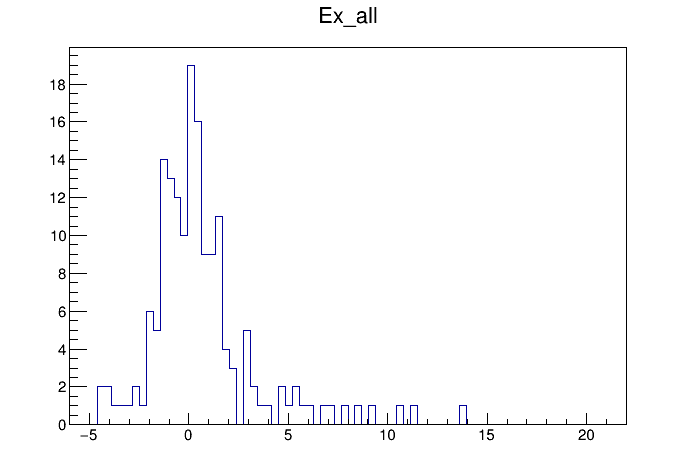

In [23]:
c2->Clear();
//q_all->Fit("g1","","",-3.+0.3,3.+0.3);
q_all->Draw();
gStyle->SetOptStat(0);
c2->SetLogy(0);
c2->Draw();

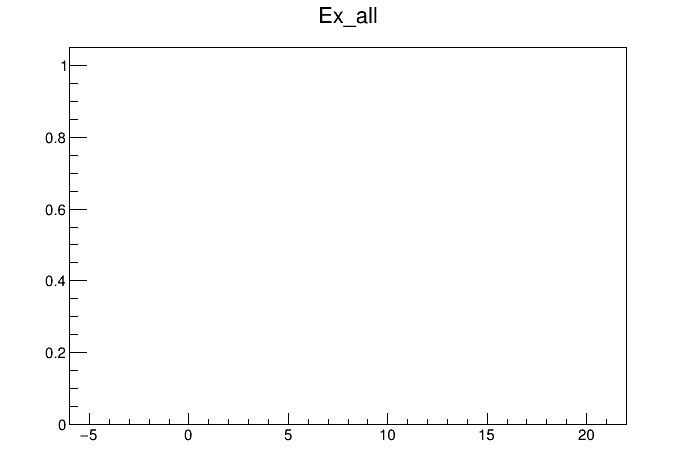

Warning in <Fit>: Fit data is empty 


In [24]:
c2->Clear();
q_nt->Fit("g1","","",-3.+0.3,3.+0.3);
q_nt->Draw();
gStyle->SetOptStat(0);
c2->SetLogy(0);
c2->Draw();

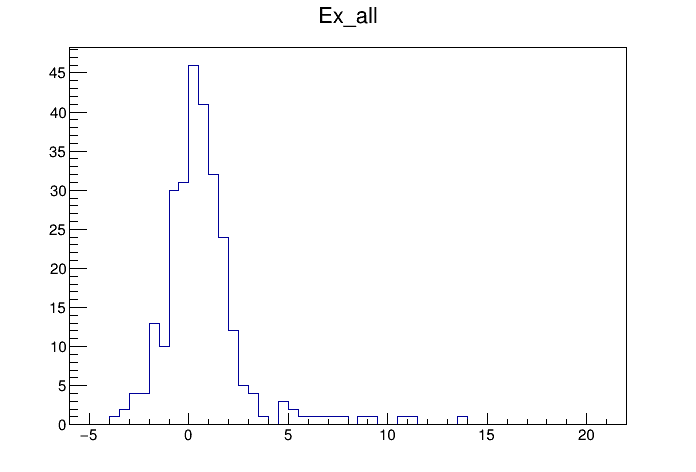

In [25]:
c2->Clear();
q_allm->Draw();
gStyle->SetOptStat(0);
c2->SetLogy(0);
c2->Draw();

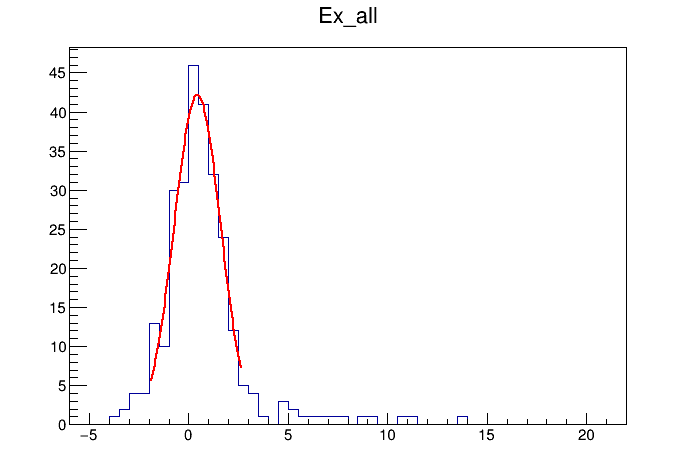

 FCN=6.82961 FROM MIGRAD    STATUS=CONVERGED      67 CALLS          68 TOTAL
                     EDM=3.37229e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.21135e+01   3.78770e+00   3.77610e-03   5.81774e-05
   2  Mean         4.49600e-01   8.89194e-02   1.20759e-04  -2.04075e-03
   3  Sigma        1.16365e+00   9.61739e-02   2.92813e-05   9.39791e-03


In [26]:
c2->Clear();
q_allm->Fit("g1","","",-1.14*2+0.37,1.14*2+0.37);
q_allm->Draw();
gStyle->SetOptStat(0);
c2->SetLogy(0);
c2->Draw();

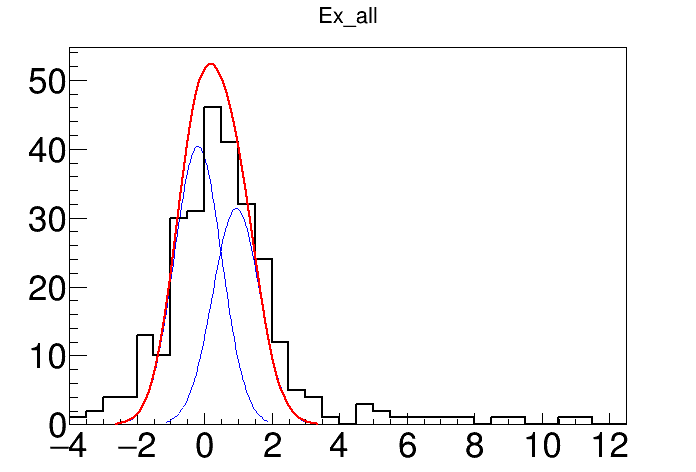

 FCN=33.8463 FROM MIGRAD    STATUS=CONVERGED     100 CALLS         101 TOTAL
                     EDM=2.051e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           4.04034e+01   2.54518e+00   1.03006e-02  -2.59950e-06
   2  p1          -2.00100e-01   1.21888e-02   1.41980e-03** at limit **
   3  p2           7.00000e-01     fixed    
   4  p3           9.40000e-01   7.07151e-03   1.07937e-03** at limit **
                               ERR DEF= 0.5


In [27]:
c2->Clear();
q_allm->GetXaxis()->SetRangeUser(-4, 12);
q_allm->GetXaxis()->SetLabelSize(0.08);  // 放大X轴数字字体
q_allm->GetYaxis()->SetLabelSize(0.08);  // 可选：同时放大Y轴字体
q_allm->SetLineColor(kBlack);       // 黑色轮廓
q_allm->SetLineWidth(2);            // 加粗
//q_t0->Fit("g1","","",0.,4.);
TF1 *ffun2p = new TF1("ffun2p","[0]*TMath::Exp(-0.5*((x-[1])/[2])^2)+[0]*1.4/1.8*TMath::Exp(-0.5*((x-[3])/[2])^2)",-3+0.37,0.37+3);
          ffun2p->SetParameter(0,8);
          ffun2p->SetParameter(1,0.0001);
          ffun2p->SetParLimits(1,-0.2001,0.2001);
          ffun2p->SetParameter(2,0.7);
          ffun2p->SetParLimits(2,0.7,0.7);
          
          ffun2p->SetParameter(3,8);
          ffun2p->SetParameter(3,0.74);
          ffun2p->SetParLimits(3,0.74-0.2,0.74+0.2);
          //ffun2->SetParameter(5,0.6);
          //ffun2->SetParLimits(5,0.1,1.2);

q_allm->Fit("ffun2p","RL");
  TF1 *ffit2p = q_allm->GetFunction("ffun2p");
   a0 = ffit2p->GetParameter(0);
   a1 = ffit2p->GetParameter(1);
   a2 = ffit2p->GetParameter(2);
   a3 = a0*1.4/1.8;//ffit2p->GetParameter(3);
   a4 = ffit2p->GetParameter(3);
   //a5 = ffit2p->GetParameter(5);
TString name_p2ff1= TString::Format("%f*TMath::Exp(-0.5*((x-%f)/%f)^2)",a0,a1,a2);
TF1 *p2ff1=new TF1("p2ff1",name_p2ff1.Data(),a1-3*a2,a1+3*a2);
TString name_p2ff2= TString::Format("%f*TMath::Exp(-0.5*((x-%f)/%f)^2)",a3,a4,a2);
TF1 *p2ff2=new TF1("p2ff2",name_p2ff2.Data(),a4-3*a2,a4+3*a2);
p2ff1->SetLineColor(kBlue);
p2ff1->SetLineWidth(1);
p2ff1->Draw("same");
p2ff2->SetLineColor(kBlue);
p2ff2->SetLineWidth(1);
p2ff2->Draw("same");
q_allm->Draw("same");
gStyle->SetOptStat(0);
c2->SetLogy(0);
c2->Draw();

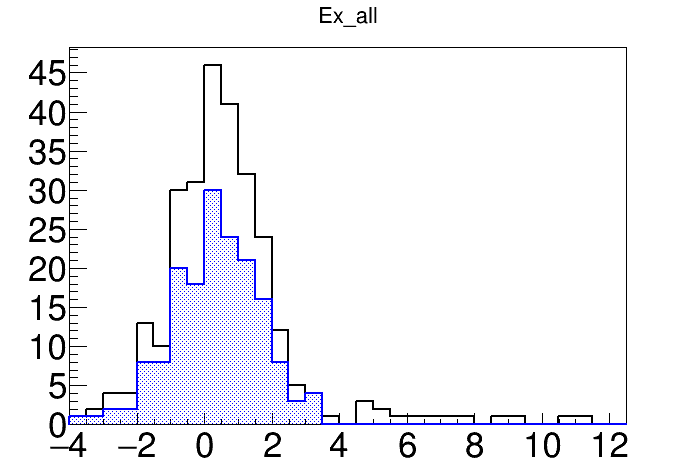

In [28]:
c2->Clear();
/*
//①
q_allm->Draw("HIST"); // 原色线条
q_allm->SetFillStyle(1001);            // 交叉线填充
q_allmtemp->SetFillColor(kRed);
q_allmtemp->SetFillColorAlpha(kRed, 0.5);  // 半透明红色
q_allmtemp->SetFillStyle(3003);            // 交叉线填充
q_allmtemp->SetLineColor(kRed);            // 轮廓线为红色
q_allmtemp->SetLineWidth(1);               // 加粗轮廓线
q_allmtemp->Draw("HIST SAME"); //
*/   
/*  //②
q_allm->SetLineColor(kBlue+2);      // 深蓝色
q_allm->SetLineWidth(2);            // 加粗轮廓线
q_allm->SetFillStyle(0);            // 不填充（仅轮廓）

// 设置 q_t 样式（半透明红色填充+红色轮廓）
q_allmtemp->SetLineColor(kRed);            // 红色轮廓
q_allmtemp->SetLineWidth(2);               // 加粗轮廓线
q_allmtemp->SetFillColorAlpha(kRed, 0.4);  // 40%透明红色填充
*/
  //③
// 设置 q_allm 样式（黑色轮廓）

q_allm->SetLineColor(kBlack);       // 黑色轮廓
q_allm->SetLineWidth(2);            // 加粗
q_allm->SetFillStyle(0);            // 无填充

// 设置 q_t 样式（蓝色交叉线填充）
q_allmn->SetLineColor(kBlue);           // 蓝色轮廓
q_allmn->SetLineWidth(2);
q_allmn->SetFillColor(kBlue);           // 填充颜色
q_allmn->SetFillStyle(3003);            // 交叉线填充

// 绘制顺序
q_allm->Draw("HIST");    // 先绘制总分布
q_allmn->Draw("HIST SAME");  // 叠加 q_t

/*
// 设置 q_allm 样式（浅灰色填充+深灰轮廓）
q_allm->SetLineColor(kGray+2);      // 深灰色轮廓
q_allm->SetFillColor(kGray);        // 浅灰色填充
q_allm->SetFillStyle(1001);         // 实心填充

// 设置 q_t 样式（红色点阵填充）
q_allmtemp->SetLineColor(kRed);            // 红色轮廓
q_allmtemp->SetFillColor(kRed);            
q_allmtemp->SetFillStyle(3007);            // 密集点阵填充

// 绘制时调整 Y 轴范围（避免 q_allm 填充覆盖 q_t）
q_allm->Draw("HIST");
q_allm->GetYaxis()->SetRangeUser(0, 1.2*q_allm->GetMaximum());
q_allmtemp->Draw("HIST SAME");
*/


gStyle->SetOptStat(0);
c2->SetLogy(0);
c2->Draw();

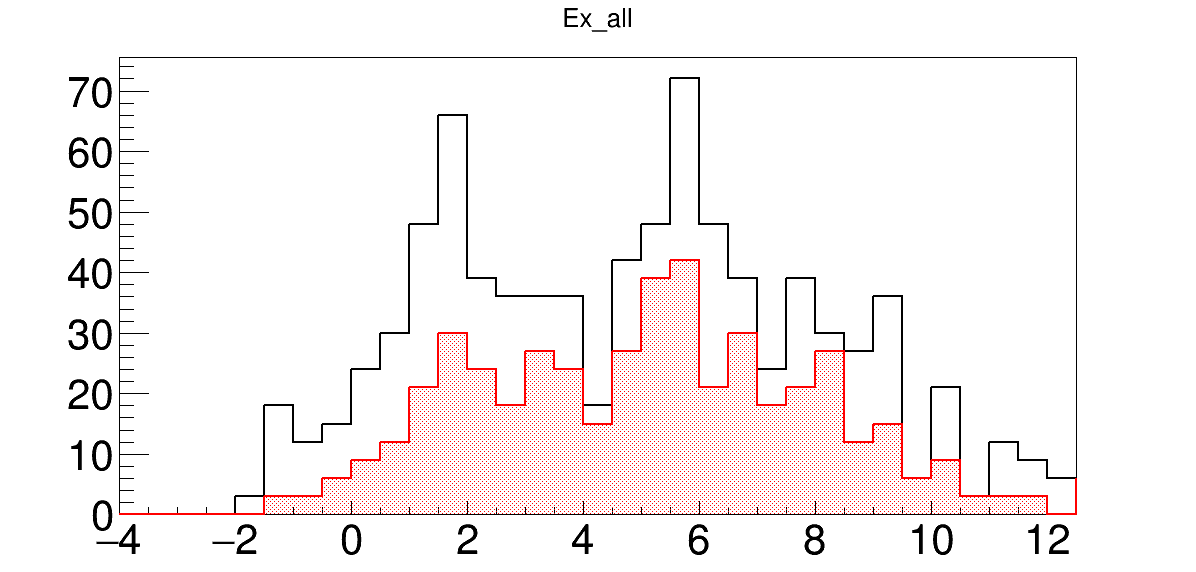

In [29]:
c4->Clear();
/*
//①
q_allm->Draw("HIST"); // 原色线条
q_allm->SetFillStyle(1001);            // 交叉线填充
q_allmtemp->SetFillColor(kRed);
q_allmtemp->SetFillColorAlpha(kRed, 0.5);  // 半透明红色
q_allmtemp->SetFillStyle(3003);            // 交叉线填充
q_allmtemp->SetLineColor(kRed);            // 轮廓线为红色
q_allmtemp->SetLineWidth(1);               // 加粗轮廓线
q_allmtemp->Draw("HIST SAME"); //
*/   
/*  //②
q_allm->SetLineColor(kBlue+2);      // 深蓝色
q_allm->SetLineWidth(2);            // 加粗轮廓线
q_allm->SetFillStyle(0);            // 不填充（仅轮廓）

// 设置 q_t 样式（半透明红色填充+红色轮廓）
q_allmtemp->SetLineColor(kRed);            // 红色轮廓
q_allmtemp->SetLineWidth(2);               // 加粗轮廓线
q_allmtemp->SetFillColorAlpha(kRed, 0.4);  // 40%透明红色填充
*/
  //③
// 设置 q_allm 样式（黑色轮廓）
q_allm2->GetXaxis()->SetRangeUser(-4, 12);
q_allm2->GetXaxis()->SetLabelSize(0.08);  // 放大X轴数字字体
q_allm2->GetYaxis()->SetLabelSize(0.08);  // 可选：同时放大Y轴字体
q_allm2->SetLineColor(kRed);       // 黑色轮廓
q_allm2->SetLineWidth(2);            // 加粗

q_allm2->SetLineColor(kBlack);       // 黑色轮廓
q_allm2->SetLineWidth(2);            // 加粗
q_allm2->SetFillStyle(0);            // 无填充

// 设置 q_t 样式（蓝色交叉线填充）
q_allmn2->SetLineColor(kRed);           // 蓝色轮廓
q_allmn2->SetLineWidth(2);
q_allmn2->SetFillColor(kRed);           // 填充颜色
q_allmn2->SetFillStyle(3003);            // 交叉线填充

// 绘制顺序
q_allm2->Draw("HIST");    // 先绘制总分布
q_allmn2->Draw("HIST SAME");  // 叠加 q_t

/*
// 设置 q_allm 样式（浅灰色填充+深灰轮廓）
q_allm->SetLineColor(kGray+2);      // 深灰色轮廓
q_allm->SetFillColor(kGray);        // 浅灰色填充
q_allm->SetFillStyle(1001);         // 实心填充

// 设置 q_t 样式（红色点阵填充）
q_allmtemp->SetLineColor(kRed);            // 红色轮廓
q_allmtemp->SetFillColor(kRed);            
q_allmtemp->SetFillStyle(3007);            // 密集点阵填充

// 绘制时调整 Y 轴范围（避免 q_allm 填充覆盖 q_t）
q_allm->Draw("HIST");
q_allm->GetYaxis()->SetRangeUser(0, 1.2*q_allm->GetMaximum());
q_allmtemp->Draw("HIST SAME");
*/


gStyle->SetOptStat(0);
c4->SetLogy(0);
c4->Draw();

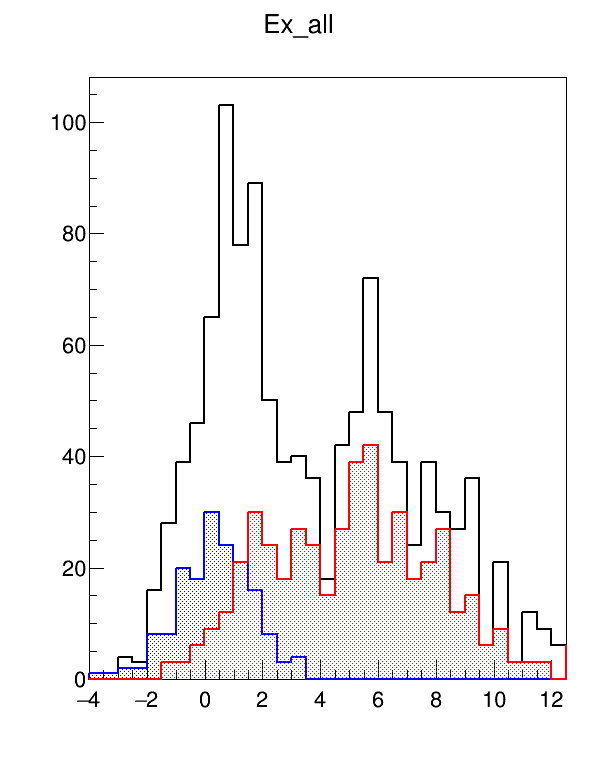

In [30]:
c5->SetLeftMargin(0.15);      // 增加左边距给Y轴标签留空间
c5->SetRightMargin(0.05);     // 适当右边距
c5->SetBottomMargin(0.12);    // 适当底部边距
c5->Clear();
q_allall->GetXaxis()->SetRangeUser(-4, 12);
q_allall->GetXaxis()->SetLabelSize(0.04);  // 放大X轴数字字体
q_allall->GetYaxis()->SetLabelSize(0.04);  // 可选：同时放大Y轴字体
q_allall->SetLineColor(kBlack);       // 黑色轮廓
q_allm->SetLineWidth(2);            // 加粗
q_allall->SetLineColor(kBlack);       // 黑色轮廓
q_allall->SetLineWidth(2);            // 加粗
q_allall->SetFillStyle(0);            // 无填充

q_allall->Draw("HIST");    // 先绘制总分布
q_allmn->Draw("HIST SAME");  // 叠加 14B
q_allmn2->Draw("HIST SAME");  // 叠加 13B
c5->SetLogy(0);
c5->Draw();

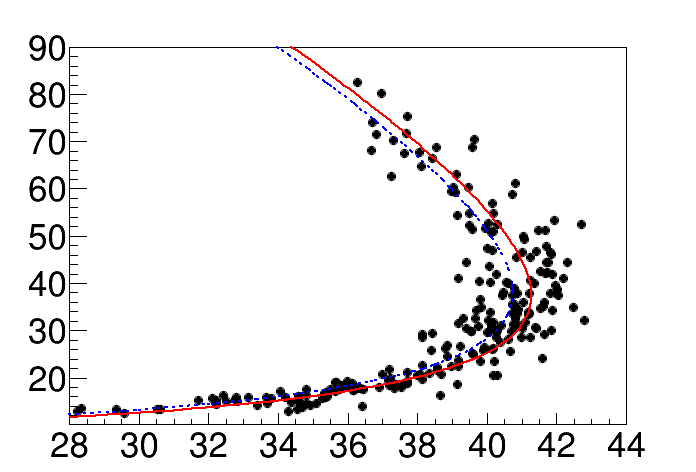

In [31]:
c2->Clear();
T1E_newtheta_new_bydstar_allm->GetXaxis()->SetLabelSize(0.08);  // 放大X轴数字字体
T1E_newtheta_new_bydstar_allm->GetYaxis()->SetLabelSize(0.08);  // 可选：同时放大Y轴字体
T1E_newtheta_new_bydstar_allm->GetXaxis()->SetLimits(28, 44);
T1E_newtheta_new_bydstar_allm->GetYaxis()->SetRangeUser(10.1 , 90); 
//T1E_newtheta_new_bydstar_allm->GetXaxis()->SetLimits(20, 41);
//T1E_newtheta_new_bydstar_allm->GetYaxis()->SetRangeUser(5 , 35); 
T1E_newtheta_new_bydstar_allm->SetMarkerStyle(8);
T1E_newtheta_new_bydstar_allm->SetMarkerSize(1.);
T1E_newtheta_new_bydstar_allm->SetMarkerColor(1);
T1E_newtheta_new_bydstar_allm->Draw("ap");
T1Etheta_B14He3_0->SetMarkerStyle(6);
T1Etheta_B14He3_654->SetMarkerStyle(6);
T1Etheta_B14He3_0->SetMarkerColor(2);
T1Etheta_B14He3_654->SetMarkerColor(4);
T1Etheta_B14He3_0->SetLineStyle(3);
T1Etheta_B14He3_654->SetLineStyle(2);
T1Etheta_B14He3_0->SetLineStyle(1);
T1Etheta_B14He3_654->SetLineStyle(2);
T1Etheta_B14He3_0->SetLineWidth(2);
T1Etheta_B14He3_654->SetLineWidth(2);
T1Etheta_B14He3_0->SetLineColor(2);
T1Etheta_B14He3_654->SetLineColor(4);
T1Etheta_B14He3_0->Draw("C same");
T1Etheta_B14He3_654->Draw("C same");
   //TText* textT1E_newtheta_new_bydstar_all = new TText(40, 5, Form("%d", T1E_newtheta_new_bydstar_allm->GetN()));
   //textT1E_newtheta_new_bydstar_all->SetTextAlign(15); // 设置文本对齐方式
   //textT1E_newtheta_new_bydstar_all->SetTextSize(0.08); // 设置文本大小
   //textT1E_newtheta_new_bydstar_all->Draw("samep"); // 在图上显示文本
c2->SetLogy(0);
c2->Draw();

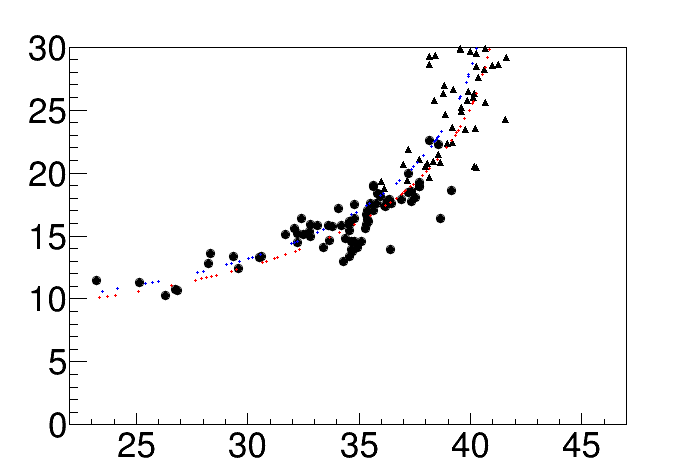

74

In [32]:
c2->Clear();
T1E_newtheta_new_bydstar_allm->GetXaxis()->SetLimits(22, 47);
T1E_newtheta_new_bydstar_allm->GetYaxis()->SetRangeUser(0 , 30); 
T1E_newtheta_new_bydstar_allm->SetMarkerStyle(22);
T1E_newtheta_new_bydstar_allm->SetMarkerSize(1.);
T1E_newtheta_new_bydstar_allm->SetMarkerColor(1);
T1E_newtheta_new_bydstar_allm->Draw("ap");
T1E_newtheta_new_bydstar_allnt->SetMarkerStyle(8);
T1E_newtheta_new_bydstar_allnt->SetMarkerSize(1);
T1E_newtheta_new_bydstar_allnt->SetMarkerColor(1);
T1E_newtheta_new_bydstar_allnt->Draw("samep");
T1Etheta_B14He3_0->SetMarkerStyle(6);
T1Etheta_B14He3_654->SetMarkerStyle(6);
T1Etheta_B14He3_0->SetMarkerColor(2);
T1Etheta_B14He3_654->SetMarkerColor(4);
T1Etheta_B14He3_0->Draw("samep");
T1Etheta_B14He3_654->Draw("samep");
   TText* textT1E_newtheta_new_bydstar_aall = new TText(25, 60, Form("%d", T1E_newtheta_new_bydstar_allm->GetN()));
   textT1E_newtheta_new_bydstar_aall->SetTextAlign(15); // 设置文本对齐方式
   textT1E_newtheta_new_bydstar_aall->SetTextSize(0.08); // 设置文本大小
   textT1E_newtheta_new_bydstar_aall->Draw("samep"); // 在图上显示文本
cout<<T1E_newtheta_new_bydstar_allnt->GetN();
c2->SetLogy(0);
c2->Draw();

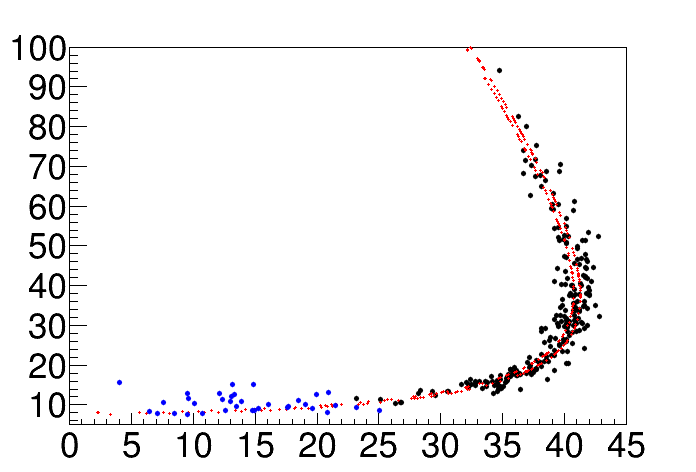

240


In [33]:
c2->Clear();
T1E_newtheta_new_bydstar_allm->GetXaxis()->SetLimits(0, 45);
T1E_newtheta_new_bydstar_allm->GetYaxis()->SetRangeUser(5 , 100); 
T1E_newtheta_new_bydstar_allm->SetMarkerStyle(8);
T1E_newtheta_new_bydstar_allm->SetMarkerColor(1);
T1E_newtheta_new_bydstar_allm->SetMarkerSize(0.7);
T1E_newtheta_new_bydstar_allm->Draw("ap");
T1Etheta_B14He3_0->SetMarkerStyle(6);
T1Etheta_B14He3_654->SetMarkerStyle(6);
T1Etheta_B14He3_0->SetMarkerColor(2);
T1Etheta_B14He3_654->SetMarkerColor(2);
T1Etheta_B14He3_0->Draw("samep");
T1Etheta_B14He3_654->Draw("samep");
T1E_newtheta_new_bydstar_t0->SetMarkerStyle(8);
T1E_newtheta_new_bydstar_t0->SetMarkerColor(4);
T1E_newtheta_new_bydstar_t0->SetMarkerSize(0.7);
T1E_newtheta_new_bydstar_t0->Draw("samep");

cout<<T1E_newtheta_new_bydstar_allm->GetN()<<'\n';
c2->SetLogy(0);
c2->Draw();

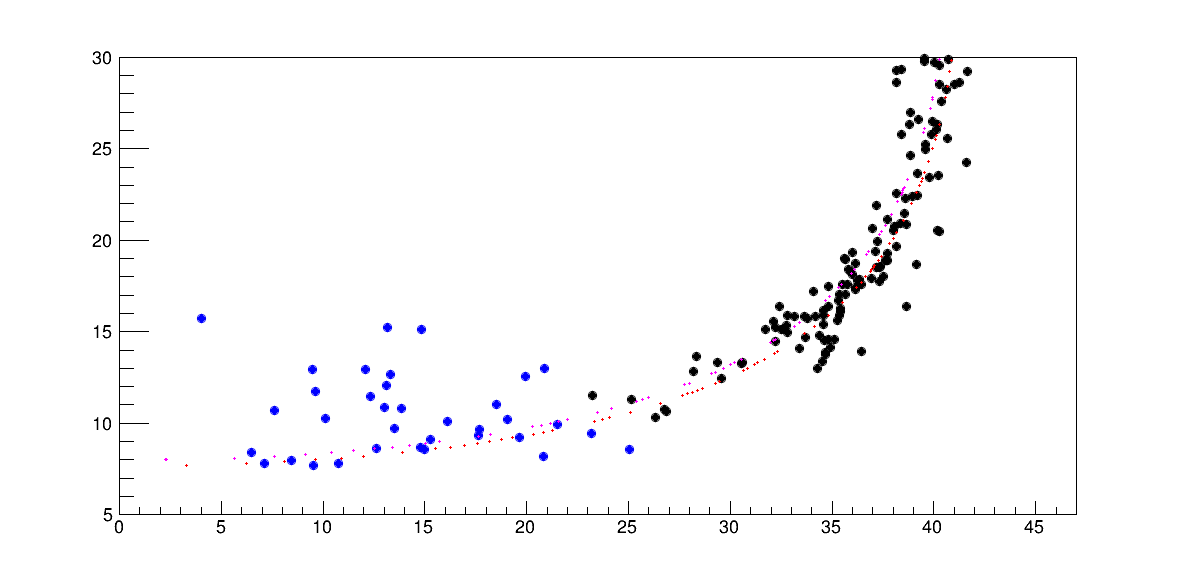

287


In [34]:
c3->Clear();
T1E_newtheta_new_bydstar_t0->GetXaxis()->SetLimits(0, 47);
T1E_newtheta_new_bydstar_t0->GetYaxis()->SetRangeUser(5 , 30); 
T1E_newtheta_new_bydstar_allm->SetMarkerStyle(8);
T1E_newtheta_new_bydstar_allm->SetMarkerSize(1.);
T1E_newtheta_new_bydstar_allm->SetMarkerColor(1);
T1E_newtheta_new_bydstar_t0->SetMarkerStyle(8);
T1E_newtheta_new_bydstar_t0->SetMarkerColor(4);
T1E_newtheta_new_bydstar_t0->SetMarkerSize(1);
T1E_newtheta_new_bydstar_t0->Draw("ap");
T1Etheta_B14He3_0->SetMarkerStyle(6);
T1Etheta_B14He3_654->SetMarkerStyle(6);
T1Etheta_B14He3_0->SetMarkerColor(2);
T1Etheta_B14He3_654->SetMarkerColor(6);
T1E_newtheta_new_bydstar_allm->Draw("samep");
T1Etheta_B14He3_0->Draw("samep");
T1Etheta_B14He3_654->Draw("samep");
   //TText* textT1E_newtheta_new_bydstar_all3 = new TText(5, 2, Form("%d", T1E_newtheta_new_bydstar_t0->GetN()));
   //textT1E_newtheta_new_bydstar_all3->SetTextAlign(15); // 设置文本对齐方式
   //textT1E_newtheta_new_bydstar_all3->SetTextSize(0.08); // 设置文本大小
   //textT1E_newtheta_new_bydstar_all3->Draw("samep"); // 在图上显示文本
cout<<T1E_newtheta_new_bydstar_all->GetN()<<'\n';
c3->SetLogy(0);
c3->Draw();

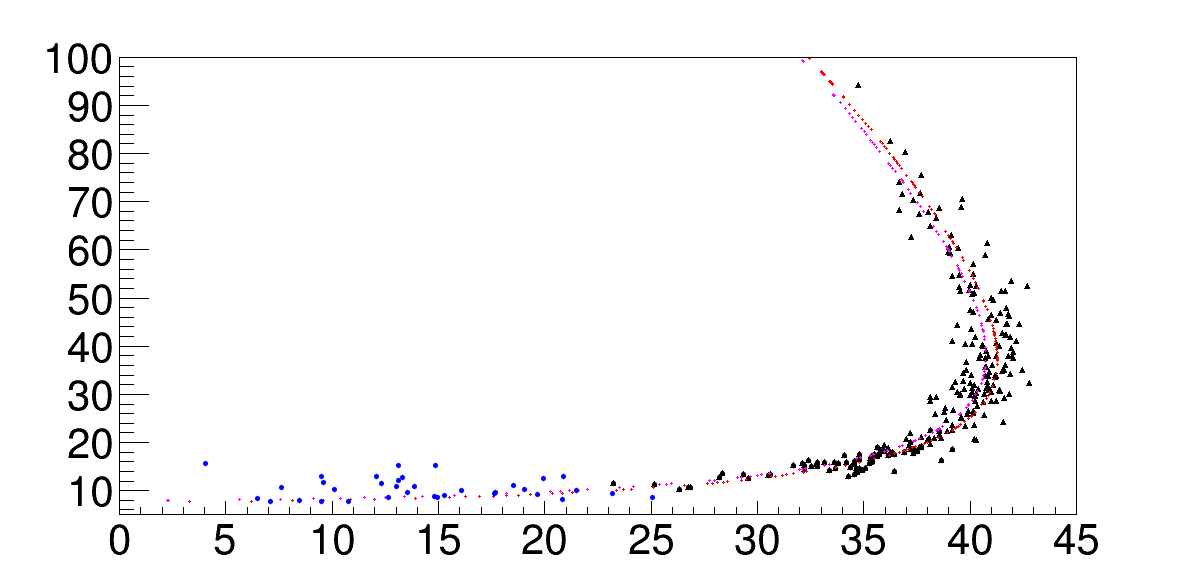

240	166	74


In [35]:
c3->Clear();
T1E_newtheta_new_bydstar_allm->GetXaxis()->SetLimits(0, 45);
T1E_newtheta_new_bydstar_allm->GetYaxis()->SetRangeUser(5 , 100); 
T1E_newtheta_new_bydstar_allm->SetMarkerStyle(22);
T1E_newtheta_new_bydstar_allm->SetMarkerColor(1);
T1E_newtheta_new_bydstar_allm->SetMarkerSize(0.9);
T1E_newtheta_new_bydstar_allm->Draw("ap");
T1E_newtheta_new_bydstar_allnt->SetMarkerStyle(8);
T1E_newtheta_new_bydstar_allnt->SetMarkerColor(1);
T1E_newtheta_new_bydstar_allnt->SetMarkerSize(0.7);
T1E_newtheta_new_bydstar_allnt->Draw("samep");
T1Etheta_B14He3_0->SetMarkerStyle(6);
T1Etheta_B14He3_654->SetMarkerStyle(6);
T1Etheta_B14He3_0->SetMarkerColor(2);
T1Etheta_B14He3_654->SetMarkerColor(6);
T1Etheta_B14He3_0->Draw("samep");
T1Etheta_B14He3_654->Draw("samep");
T1E_newtheta_new_bydstar_t0->SetMarkerStyle(8);
T1E_newtheta_new_bydstar_t0->SetMarkerColor(4);
T1E_newtheta_new_bydstar_t0->SetMarkerSize(0.7);
T1E_newtheta_new_bydstar_t0->Draw("samep");

cout<<T1E_newtheta_new_bydstar_allt->GetN()+T1E_newtheta_new_bydstar_allnt->GetN()<<'\t'<<T1E_newtheta_new_bydstar_allt->GetN()<<'\t'<<T1E_newtheta_new_bydstar_allnt->GetN()<<'\n';
c3->SetLogy(0);
c3->Draw();

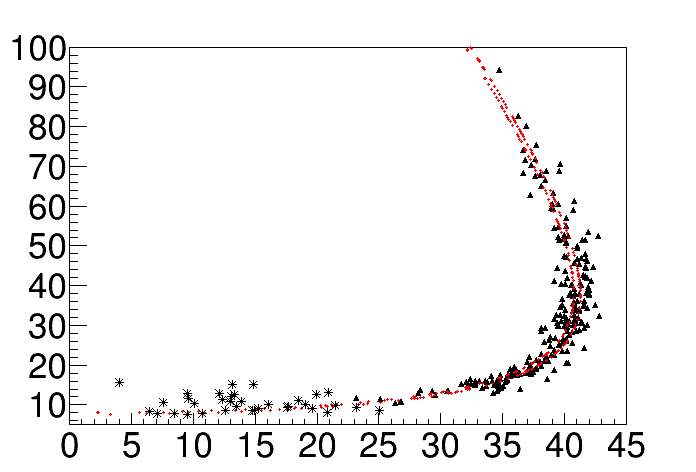

In [36]:
T1E_newtheta_new_bydstar_t0->GetXaxis()->SetLimits(0, 35);
T1E_newtheta_new_bydstar_t0->GetYaxis()->SetRangeUser(0 , 20); 
T1E_newtheta_new_bydstar_t0->SetMarkerStyle(3);
T1E_newtheta_new_bydstar_t0->SetMarkerSize(1);
T1E_newtheta_new_bydstar_t0->SetMarkerColor(1);
T1E_newtheta_new_bydstar_t0->Draw("ap");
T1Etheta_B14He3_0->SetMarkerStyle(6);
T1Etheta_B14He3_654->SetMarkerStyle(6);
T1Etheta_B14He3_0->SetMarkerColor(2);
T1Etheta_B14He3_654->SetMarkerColor(2);
T1Etheta_B14He3_0->Draw("samep");
T1Etheta_B14He3_654->Draw("samep");
   TText* textT1E_newtheta_new_bydstar_all2 = new TText(5, 18, Form("%d", mycountt0));
   textT1E_newtheta_new_bydstar_all2->SetTextAlign(15); // 设置文本对齐方式
   textT1E_newtheta_new_bydstar_all2->SetTextSize(0.08); // 设置文本大小
   textT1E_newtheta_new_bydstar_all2->Draw("samep"); // 在图上显示文本
c2->SetLogy(0);
c2->Draw();

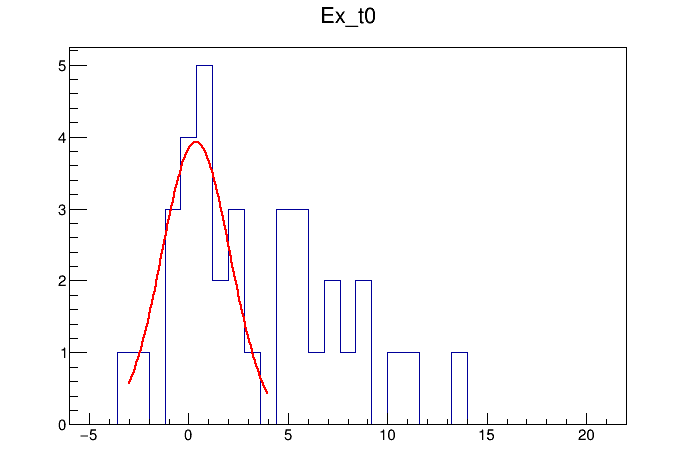

 FCN=1.20543 FROM MIGRAD    STATUS=CONVERGED      67 CALLS          68 TOTAL
                     EDM=1.76533e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.92783e+00   1.21160e+00   6.75276e-04  -1.03028e-06
   2  Mean         3.78703e-01   5.07499e-01   3.62733e-04   4.58659e-05
   3  Sigma        1.71020e+00   5.04236e-01   6.29760e-05  -4.89154e-04


In [37]:
c2->Clear();
q_t0->Fit("g1","","",-3.,4.);
q_t0->Draw();
gStyle->SetOptStat(0);
c2->SetLogy(0);
c2->Draw();

In [38]:
//T1E_newtheta_new_bydstar_all;
Double_t cross_0[10],cross_654[10];
Double_t dcross_0[10],dcross_654[10];
Double_t dNfinal_0[10],dNfinal2_0[10],dNfinal_654[10];
Double_t solid_0[10],solid2_0[10],solid_654[10];
Double_t count_0[10],count2_0[10],count_654[10];
Double_t low_0[10],low_654[10];
Double_t high_0[10],high_654[10];
Double_t low_cm_0[10],low_cm_654[10];
Double_t high_cm_0[10],high_cm_654[10];
Double_t Elow_0[10],Elow_654[10];
Double_t Ehigh_0[10],Ehigh_654[10];

Double_t theangle_cm_0[10],theangle_cm_654[10];
for(Int_t ii=0;ii<10;ii++){
    cross_0[ii]=0;
    cross_654[ii]=0;
    solid_0[ii]=0;
    solid_654[ii]=0;
    Elow_0[ii]=0;
    Elow_654[ii]=0;
    Ehigh_0[ii]=1000;
    Ehigh_654[ii]=1000;
}
/*
low_0[0]=24;high_0[0]=29;low_cm_0[0]=158;high_cm_0[0]=167;
low_0[1]=29;high_0[1]=35;low_cm_0[1]=147;high_cm_0[1]=163;
low_0[2]=35;high_0[2]=43;low_cm_0[2]=138;high_cm_0[2]=157;Ehigh_0[2]=30.1;
low_0[3]=37;high_0[3]=43;low_cm_0[3]=125;high_cm_0[3]=138;Elow_0[3]=30.1;Ehigh_0[3]=44.6;
low_0[4]=37;high_0[4]=43;low_cm_0[4]=113;high_cm_0[4]=125;Elow_0[4]=44.6;Ehigh_0[4]=60.5;
*/


low_0[0]=24;high_0[0]=29;low_cm_0[0]=155;high_cm_0[0]=169;
low_0[1]=24;high_0[1]=29;low_cm_0[1]=155;high_cm_0[1]=169;
low_0[2]=29;high_0[2]=35;low_cm_0[2]=145;high_cm_0[2]=165;
low_0[3]=35;high_0[3]=38;low_cm_0[3]=138;high_cm_0[3]=157;
low_0[4]=38;high_0[4]=43;low_cm_0[4]=138;high_cm_0[4]=157;//Ehigh_0[4]=30.1;
low_0[5]=38;high_0[5]=43;low_cm_0[5]=125;high_cm_0[5]=138;//Elow_0[5]=30.1;Ehigh_0[5]=44.6;
low_0[6]=38;high_0[6]=43;low_cm_0[6]=113;high_cm_0[6]=125;//Elow_0[6]=44.6;Ehigh_0[6]=60.5;

low_0[7]=7;high_0[7]=15;
low_0[8]=15;high_0[8]=22;

/*
theangle_cm_0[0]=164;
theangle_cm_0[1]=158;
//theangle_cm_0[0]=162;
//theangle_cm_0[1]=156;
theangle_cm_0[2]=146;
theangle_cm_0[3]=131;
theangle_cm_0[4]=120;
theangle_cm_0[5]=106;
*/
/*
low_6100[0]=23;high_6100[0]=26;low_cm_6100[0]=157;high_cm_6100[0]=166;
low_6100[1]=26;high_6100[1]=29;low_cm_6100[1]=154;high_cm_6100[1]=163;
low_6100[2]=29;high_6100[2]=32;low_cm_6100[2]=148;high_cm_6100[2]=160;
low_6100[3]=32;high_6100[3]=34;low_cm_6100[3]=142;high_cm_6100[3]=157;
low_6100[4]=34;high_6100[4]=40;low_cm_6100[4]=129;high_cm_6100[4]=152;Ehigh_6100[4]=30.9;
low_6100[5]=34;high_6100[5]=40;low_cm_6100[5]=93;high_cm_6100[5]=129;Elow_6100[5]=30.9;
low_6100[6]=32;high_6100[6]=34;low_cm_6100[6]=84;high_cm_6100[6]=111;
theangle_cm_6100[0]=162;
theangle_cm_6100[1]=159;
theangle_cm_6100[2]=155;
theangle_cm_6100[3]=151;
theangle_cm_6100[4]=140;
theangle_cm_6100[5]=116;
theangle_cm_6100[6]=97;

*/

Double_t angle_cm_left_0[10], angle_cm_left_654[10];
Double_t angle_cm_right_0[10], angle_cm_right_654[10];
Double_t dangle_left_0[10],dangle_left_654[10];
Double_t dangle_right_0[10],dangle_right_654[10];
/*
angle_cm_left_0[0]=161.1;  angle_cm_right_0[0]=165.6;
angle_cm_left_0[1]=153.54;  angle_cm_right_0[1]=161.1;
angle_cm_left_0[2]=138;  angle_cm_right_0[2]=153.54;
angle_cm_left_0[3]=125.;  angle_cm_right_0[3]=138;
angle_cm_left_0[4]=110.07;  angle_cm_right_0[4]=125.;
*/

angle_cm_left_0[0]=161.1;  angle_cm_right_0[0]=165.6;
angle_cm_left_0[1]=161.1;  angle_cm_right_0[1]=165.6;
//angle_cm_left_0[2]=153.54;  angle_cm_right_0[2]=157.86;
angle_cm_left_0[2]=153.54;  angle_cm_right_0[2]=161.1;
angle_cm_left_0[3]=147.33;  angle_cm_right_0[3]=153.54;
angle_cm_left_0[4]=138;  angle_cm_right_0[4]=147.33;
angle_cm_left_0[5]=125.;  angle_cm_right_0[5]=138;
angle_cm_left_0[6]=110.07;  angle_cm_right_0[6]=125.;

angle_cm_left_0[7]=171.72;  angle_cm_right_0[7]=176.31;
angle_cm_left_0[8]=167.04;  angle_cm_right_0[8]=171.72;


for(Int_t ii=0;ii<9;ii++)theangle_cm_0[ii]=(angle_cm_left_0[ii]+angle_cm_right_0[ii])/2.;
/*
angle_cm_left_6100[0]=160.65;	angle_cm_right_6100[0]=163.62;
angle_cm_left_6100[1]=157.05;	angle_cm_right_6100[1]=160.65;
angle_cm_left_6100[2]=152.55;	angle_cm_right_6100[2]=157.05;
angle_cm_left_6100[3]=148.59;	angle_cm_right_6100[3]=152.55;
angle_cm_left_6100[4]=129;   	angle_cm_right_6100[4]=148.59;
angle_cm_left_6100[5]=100.98;	angle_cm_right_6100[5]=129;
angle_cm_left_6100[6]=92.97; 	angle_cm_right_6100[6]=100.98;
*/

for(Int_t ii=0;ii<10;ii++){
    dangle_left_0[ii]=theangle_cm_0[ii]-angle_cm_left_0[ii];
    dangle_right_0[ii]=-theangle_cm_0[ii]+angle_cm_right_0[ii];
}


Int_t npoints_all=T1E_newtheta_new_bydstar_allm->GetN();
Double_t *E_dall=T1E_newtheta_new_bydstar_allm->GetY();
Double_t *theta_dall=T1E_newtheta_new_bydstar_allm->GetX();
Double_t *Q_dall=T1E_newtheta_new_bydstar_allm2->GetY();
Double_t *rkey=T1E_newtheta_new_bydstar_allm2->GetX();

Double_t *E_dallt0=T1E_newtheta_new_bydstar_t0->GetY();
Double_t *theta_dallt0=T1E_newtheta_new_bydstar_t0->GetX();
Double_t *E_dallt0a=T1E_newtheta_new_bydstar_t0a->GetY();
Double_t *theta_dallt0a=T1E_newtheta_new_bydstar_t0a->GetX();
Double_t *E_dallt0b=T1E_newtheta_new_bydstar_t0b->GetY();
Double_t *theta_dallt0b=T1E_newtheta_new_bydstar_t0b->GetX();

Double_t thetafde1[1000002],thetafang1[1000002],thetheta_cm1[1000002],thedd=100000,theddtemp;
Double_t thetafde2[1000002],thetafang2[1000002],thetheta_cm2[1000002];
Double_t thetafde1_654[1000002],thetafang1_654[1000002],thetheta_cm1_654[1000002];
Double_t thetafde2_654[1000002],thetafang2_654[1000002],thetheta_cm2_654[1000002];
Int_t theid;
for(Int_t ii=0;ii<1000002;ii++){
    thetafde1[ii]=0;
    thetafang1[ii]=0;
    thetheta_cm1[ii]=0;
    thetafde2[ii]=0;
    thetafang2[ii]=0;
    thetheta_cm2[ii]=0;
}

Int_t count_g4_1_0=0,count_g4_2_0=0;

   TFile *udead2_0=new TFile("/data/d1/share/zhuhy/2023geant4sim_solid_3He/hit/realhit.root");
   TTree *tudead2_0=(TTree*) udead2_0->Get("tree");
   int countE_theta_lab1_0=0,countE_theta_lab2_0=0;
   TGraph *E_theta_lab_1_0=new TGraph;
   TGraph *E_theta_lab_2_0=new TGraph;
   TGraph *E_theta_lab_0=new TGraph;
   Int_t count_E_theta_lab_0=0;

   Double_t tafde1_0,tafangle1_0,theta_cm1_0,theEx1_0,nowEx1_0;
   tudead2_0->SetBranchAddress("tafde", &tafde1_0);
   tudead2_0->SetBranchAddress("tafangle", &tafangle1_0);
   tudead2_0->SetBranchAddress("theta_cm", &theta_cm1_0);
   tudead2_0->SetBranchAddress("Ex", &theEx1_0);
   tudead2_0->SetBranchAddress("nowEx", &nowEx1_0);
   Long64_t nentries05_0 = tudead2_0->GetEntries();
   for (Long64_t jentry05_0=1; jentry05_0<nentries05_0;jentry05_0++) {
      tudead2_0->GetEntry(jentry05_0);
      if(tafangle1_0>15&&tafangle1_0<50&&nowEx1_0>0)E_theta_lab_1_0->SetPoint(countE_theta_lab1_0++,tafangle1_0,tafde1_0);
      if(tafangle1_0>15&&tafangle1_0<50&&nowEx1_0<0)E_theta_lab_2_0->SetPoint(countE_theta_lab2_0++,tafangle1_0,tafde1_0);
      if(tafangle1_0>15&&tafangle1_0<50&&tafde1_0>=11&&tafde1_0<100&&count_E_theta_lab_0<5000)E_theta_lab_0->SetPoint(count_E_theta_lab_0++,tafangle1_0,tafde1_0);
      if(tafangle1_0>15&&tafangle1_0<50&&tafde1_0>=5&&theta_cm1_0>100&&theEx1_0>-3&&theEx1_0<5){
              thetafde1[count_g4_1_0]=tafde1_0;
              thetafang1[count_g4_1_0]=tafangle1_0;  
              thetheta_cm1[count_g4_1_0]=theta_cm1_0; 
              count_g4_1_0++;
      }
   }
cout<<count_g4_1_0<<'\n';

245676


In [39]:
   TFile *udead2_t0=new TFile("/data/d1/share/zhuhy/t2023geant4sim_solid_3He/hit/hit_0_f.root");
   TTree *tudead2_t0=(TTree*) udead2_t0->Get("tree");
   int countE_theta_lab1_t0=0,countE_theta_lab2_t0=0;
   TGraph *E_theta_lab_1_t0=new TGraph;
   TGraph *E_theta_lab_2_t0=new TGraph;
   TGraph *E_theta_lab_t0=new TGraph;
   Int_t count_E_theta_lab_t0=0;
   Int_t count_solid_t0[10];
   Int_t count_t0[10],count_t0a[10],count_t0b[10];

   Double_t tafde1_t0,tafangle1_t0,theta_cm1_t0,theEx1_t0,nowEx1_t0,thet0d2e,thet0d2el;
   tudead2_t0->SetBranchAddress("t0d1el", &tafde1_t0);
   tudead2_t0->SetBranchAddress("t0d2e", &thet0d2e);
   tudead2_t0->SetBranchAddress("t0d2el", &thet0d2el);
   tudead2_t0->SetBranchAddress("t0anglel", &tafangle1_t0);

   Long64_t nentries05_t0 = tudead2_t0->GetEntries();
   for (Long64_t jentry05_t0=1; jentry05_t0<nentries05_t0;jentry05_t0++) {
      tudead2_t0->GetEntry(jentry05_t0);
       //cout<<tafangle1_t0<<'\t'<<tafde1_t0<<'\n';
      if(tafangle1_t0>0&&tafangle1_t0<30&&tafde1_t0>=0&&tafde1_t0<=20)E_theta_lab_t0->SetPoint(count_E_theta_lab_t0++,tafangle1_t0,tafde1_t0);
      for(Int_t ii=0;ii<2;ii++){
          if(tafangle1_t0>low_0[7+ii]&&tafangle1_t0<=high_0[7+ii]&&thet0d2el==0&&thet0d2e>220){
              count_solid_t0[ii]++;
          }
      }
   }

   TFile *udead2_t0b=new TFile("/data/d1/share/zhuhy/t2023geant4sim_solid_3He/hit/hit_0.root");
   TTree *tudead2_t0b=(TTree*) udead2_t0b->Get("tree");
   int countE_theta_lab1_t0b=0,countE_theta_lab2_t0b=0;
   TGraph *E_theta_lab_1_t0b=new TGraph;
   TGraph *E_theta_lab_2_t0b=new TGraph;
   TGraph *E_theta_lab_t0b=new TGraph;
   Int_t count_E_theta_lab_t0b=0;
   Int_t count_solid_t0b[10];

   Double_t tafde1_t0b,tafangle1_t0b,theta_cm1_t0b,theEx1_t0b,nowEx1_t0b,thet0d2eb,thet0d2elb;
   tudead2_t0b->SetBranchAddress("t0d1el", &tafde1_t0b);
   tudead2_t0b->SetBranchAddress("t0d2e", &thet0d2eb);
   tudead2_t0b->SetBranchAddress("t0d2el", &thet0d2elb);
   tudead2_t0b->SetBranchAddress("t0anglel", &tafangle1_t0b);

   Long64_t nentries05_t0b = tudead2_t0b->GetEntries();
   for (Long64_t jentry05_t0b=1; jentry05_t0b<nentries05_t0b;jentry05_t0b++) {
      tudead2_t0b->GetEntry(jentry05_t0b);
       //cout<<tafangle1_t0<<'\t'<<tafde1_t0<<'\n';
      if(tafangle1_t0b>0&&tafangle1_t0b<30&&tafde1_t0b>=0&&tafde1_t0b<=20)E_theta_lab_t0b->SetPoint(count_E_theta_lab_t0b++,tafangle1_t0b,tafde1_t0b);
      for(Int_t ii=0;ii<2;ii++){
          if(tafangle1_t0b>low_0[7+ii]&&tafangle1_t0b<=high_0[7+ii]&&thet0d2elb==0&&thet0d2eb>220){
              count_solid_t0b[ii]++;
          }
      }
   }

cout<<"solid:"<<'\n';
    for(Int_t ii=0;ii<2;ii++){
        cout<<low_0[ii+7]<<" ~ "<<high_0[ii+7]<<" : "<<count_solid_t0[ii]<<'\t'<<count_solid_t0b[ii]<<'\n';
    }



solid:
7 ~ 15 : 28834	34604
15 ~ 22 : 22885	35474


In [40]:
//cout<<"count"<<mycountt0<<'\t'<<mycountt0a<<'\t'<<mycountt0b<<'\n';
for(Int_t i=0;i<mycountt0;i++){
      for(Int_t ii=0;ii<2;ii++){
          if(theta_dallt0[i]>low_0[7+ii]&&theta_dallt0[i]<=high_0[7+ii]&&E_dallt0[i]<20){
              //if(ii==0)cout<<"E="<<E_dallt0[i]<<'\t'<<"theta="<<theta_dallt0[i]<<'\n';
              count_t0[ii]++;
          }
      }
}
for(Int_t i=0;i<mycountt0a;i++){
      for(Int_t ii=0;ii<2;ii++){
          if(theta_dallt0a[i]>low_0[7+ii]&&theta_dallt0a[i]<=high_0[7+ii]&&E_dallt0a[i]<20){
              //if(ii==0)cout<<"Ea="<<E_dallt0a[i]<<'\t'<<"theta="<<theta_dallt0a[i]<<'\n';
              count_t0a[ii]++;
          }
      }
}
for(Int_t i=0;i<mycountt0b;i++){
      for(Int_t ii=0;ii<2;ii++){
          if(theta_dallt0b[i]>low_0[7+ii]&&theta_dallt0b[i]<=high_0[7+ii]&&E_dallt0b[i]<20){
              //if(ii==0)cout<<"Eb="<<E_dallt0b[i]<<'\t'<<"theta="<<theta_dallt0b[i]<<'\n';
              count_t0b[ii]++;
          }
      }
}
cout<<"count:"<<'\n';
Double_t tempa,tempb;
    for(Int_t ii=0;ii<2;ii++){
        tempa=count_t0a[ii];
        tempb=count_t0b[ii];
        //count_t0a[ii]=count_t0a[ii]+10.17*tempa/(tempa+tempb);
        //count_t0b[ii]=count_t0b[ii]+10.17*tempb/(tempa+tempb);
        cout<<low_0[ii+7]<<" ~ "<<high_0[ii+7]<<" : "<<count_t0[ii]<<'\t'<<count_t0a[ii]<<'\t'<<count_t0b[ii]<<'\n';
    }


count:
7 ~ 15 : 20	5	6
15 ~ 22 : 11	3	6


In [41]:
   TGraph *E_theta_cm_1=new TGraph;
   TGraph *E_theta_cm_2=new TGraph;
   TGraph *theta_thetacm_7000=new TGraph;
   TH1F* h_E_exp_1 = new TH1F("E_exp_1", "E_exp_1", 100, 0, 20);
   TH1F* h_E_exp_2 = new TH1F("E_exp_2", "E_exp_2", 100, 0, 20);
   TH2F* h_E_theta_cm_1 = new TH2F("h_E_theta_cm_gs", "E vs Theta_cm_gs", 200, 0, 180, 200, 0, 100);
   TH2F* h_E_theta_cm_2 = new TH2F("h_E_theta_cm_Ex", "E vs Theta_cm_Ex", 200, 0, 180, 200, 0, 100);
   TH2F* h_E_theta_cm_all = new TH2F("h_E_theta_cm_all", "E vs Theta_cm_all", 200, 0, 180, 200, 0, 100);

Int_t thecount1=0,thecount2=0,thecount22=0;
Int_t thein;
for(Int_t i=0;i<npoints_all;i++){
    thedd=100000;
    theid=-1;
    //if(i%100==0)cout<<Q_dall[i]<<'\n';
    //if(Q_dall[i]>3)continue;
    if(theta_dall[i]>20&&theta_dall[i]<46)h_E_exp_1->Fill(E_dall[i]);
    for(Int_t j=0;j<count_g4_1_0;j++){
        theddtemp=100000;
        if(abs(theta_dall[i]-thetafang1[j])>1||abs(E_dall[i]-thetafde1[j])>1)continue;
        //cout<<"exp: E="<<E_dall[i]<<'\t'<<"angle="<<theta_dall[i]<<'\t'<<"g4: E="<<thetafde[j]<<'\t'<<"angle="<<thetafang[j]<<'\n';
        theddtemp=(theta_dall[i]-thetafang1[j])*(theta_dall[i]-thetafang1[j])+
                  (E_dall[i]-thetafde1[j])*(E_dall[i]-thetafde1[j]);
        if(theddtemp<thedd&&theddtemp>0.0001){thedd=theddtemp;theid=j;}
        //if(i%100==0&&j%10000==0)cout<<"thedd="<<thedd<<'\t'<<"theddtemp="<<theddtemp<<'\n';
    }
    //cout<<"exp: E="<<E_dall[i]<<'\t'<<"angle="<<theta_dall[i]<<'\t'<<"theta_cm="<<thetheta_cm2[theid]
    if(thedd!=-1&&thedd!=100000){        
        thein=-1;
        for(Int_t ii=0;ii<7;ii++){
            if(thetheta_cm1[theid]>low_cm_0[ii]&&thetheta_cm1[theid]<high_cm_0[ii]&&
              theta_dall[i]>low_0[ii]&&theta_dall[i]<high_0[ii]&&
              E_dall[i]>Elow_0[ii]&&E_dall[i]<Ehigh_0[ii])thein=ii;
        }
        if(thein>=0){
            if(rkey[i]<5)count_0[thein]+=1;
            else if(rkey[i]>5)count2_0[thein]+=1;
        }
//if(!(thein>=0&&thein<=5))cout<<thein<<"exp: E="<<E_dall[i]<<'\t'<<"angle="<<theta_dall[i]<<'\t'<<"theta_cm="<<thetheta_cm1[theid]<<'\n';
        E_theta_cm_1->SetPoint(thecount1++,thetheta_cm1[theid]+(Double_t)(rand()%100-50)/500.,E_dall[i]);
        h_E_theta_cm_1->Fill(thetheta_cm1[theid]+(Double_t)(rand()%100-50)/500., E_dall[i]);
        h_E_theta_cm_all->Fill(thetheta_cm1[theid]+(Double_t)(rand()%100-50)/500., E_dall[i]);
    }
}


cout<<"************ 0 and 0.654 MeV***************"<<'\n';
for(Int_t ii=0;ii<10;ii++)cout<<count_0[ii]+count2_0[ii]<<'\t'<<count_0[ii]<<'\t'<<count2_0[ii]<<'\n';
Double_t countCtar_0[10],cuntCtar_654[10];
Double_t countnotar_0[10],countnotar_654[10];

countCtar_0[0]=0.;
countCtar_0[1]=0.;
countCtar_0[2]=0.;
countCtar_0[3]=0.;
countCtar_0[4]=0.;
countCtar_0[5]=0.;



countnotar_0[0]=0.;
countnotar_0[1]=0.;
countnotar_0[2]=0.;
countnotar_0[3]=0.;
countnotar_0[4]=0.;
countnotar_0[5]=0.;

//Nfinnal= NCH-（NC-5.012*Nempty）*0.09867-16.17*Nempty 
//dNfinnal= dNCH+dNC*0.09867+ dNempty *15.675

for(Int_t ii=0;ii<7;ii++)dNfinal_0[ii]=count_0[ii];
for(Int_t ii=0;ii<7;ii++)dNfinal2_0[ii]=count2_0[ii];//+countCtar_0[ii]*0.09867;//+countnotar_0[ii]*15.675;
//for(Int_t ii=0;ii<7;ii++)count_0[ii]=count_0[ii];//-(countCtar_0[ii]-5.012*countnotar_0[ii])*0.09867;//-16.17*countnotar_0[ii];


************ 0 and 0.654 MeV***************
0	0	0
6	3	3
33	13	20
38	17	21
39	16	23
70	34	36
32	13	19
0	0	0
0	0	0
0	0	0


In [42]:
//cout<<"************ 0 and 0.654 MeV***************"<<'\n';
//for(Int_t ii=0;ii<10;ii++)cout<<count_0[ii]+count2_0[ii]<<'\t'<<count_0[ii]<<'\t'<<count2_0[ii]<<'\n';

In [43]:
//   Double_t countin=(2475659362+1962761829./cos(20.*3.1416/180.));
Double_t mid=1.;
    Double_t countin =1107434523./mid;
    Double_t countin2=1497838613./mid;

   Double_t countin_M =562024962.;
   Double_t countin2_M=716104415.;


    Double_t Emin=5.;
   TGraphAsymmErrors *thecross_0=new TGraphAsymmErrors;
   TGraphAsymmErrors *fitthecross_0=new TGraphAsymmErrors;
   TFile *filesolid_0=new TFile("/data/d1/share/zhuhy/2023geant4sim_solid_3He/hit/hit_0.root");
   TTree *treesolid_0=(TTree*) filesolid_0->Get("tree");
   Double_t tafde_0,tafangle_0,theta_cm_0,theEx_0,nowEx_0;
   treesolid_0->SetBranchAddress("tafde", &tafde_0);
   treesolid_0->SetBranchAddress("tafangle", &tafangle_0);
   treesolid_0->SetBranchAddress("theta_cm", &theta_cm_0);
   treesolid_0->SetBranchAddress("Ex", &theEx_0);
   treesolid_0->SetBranchAddress("nowEx", &nowEx_0);
   Long64_t nentries_0 = treesolid_0->GetEntries();
   Double_t angle_cm;
   for (Long64_t jentry_0=0; jentry_0<nentries_0;jentry_0++) {
        treesolid_0->GetEntry(jentry_0);    
        thein=-1;
        if(tafde_0<Emin)continue;
        for(Int_t ii=0;ii<7;ii++){
            if(theta_cm_0>low_cm_0[ii]&&theta_cm_0<high_cm_0[ii]&&
              tafangle_0>low_0[ii]&&tafangle_0<high_0[ii]&&
              tafde_0>Elow_0[ii]&&tafde_0<Ehigh_0[ii]
               &&theEx_0<4&&theEx_0>-4
               &&theta_cm_0>99)thein=ii;
        }
        if(thein>=0)solid_0[thein]+=1;
   }

   TFile *filesolid_02=new TFile("/data/d1/share/zhuhy/2023geant4sim_solid_3He/hit/hit_0_f.root");
   TTree *treesolid_02=(TTree*) filesolid_0->Get("tree");
   Double_t tafde_02,tafangle_02,theta_cm_02,theEx_02,nowEx_02;
   treesolid_0->SetBranchAddress("tafde", &tafde_02);
   treesolid_0->SetBranchAddress("tafangle", &tafangle_02);
   treesolid_0->SetBranchAddress("theta_cm", &theta_cm_02);
   treesolid_0->SetBranchAddress("Ex", &theEx_02);
   treesolid_0->SetBranchAddress("nowEx", &nowEx_02);
   Long64_t nentries_02 = treesolid_02->GetEntries();
   Double_t angle_cm2;
   for (Long64_t jentry_02=0; jentry_02<nentries_02;jentry_02++) {
        treesolid_02->GetEntry(jentry_02);    
        thein=-1;
        if(tafde_02<Emin)continue;
        for(Int_t ii=0;ii<7;ii++){
            if(theta_cm_02>low_cm_0[ii]&&theta_cm_02<high_cm_0[ii]&&
              tafangle_02>low_0[ii]&&tafangle_02<high_0[ii]&&
              tafde_02>Elow_0[ii]&&tafde_02<Ehigh_0[ii]
               &&theEx_02<5&&theEx_02>-3
               &&theta_cm_02>99)thein=ii;
        }
        if(thein>=0)solid2_0[thein]+=1;
   }
cout<<"************  solid***************"<<'\n';
for(Int_t ii=0;ii<10;ii++)cout<<solid_0[ii]<<'\t'<<solid2_0[ii]<<'\n';
   cout<<'\n';



Double_t thecross0,thecross1,thedcross0,thedcross1;
cout<<"cross of g,s : "<<'\n';
cout<<"taf:"<<'\n';
Double_t tempcross1,tempcross2;
   for(Int_t ii=2;ii<6;ii++){
/*
       cross_0[ii]=1e27*count_0[ii]/(countin*_ntarget*solid_0[ii]*3.1416*4/1000000.);
       cout<<cross_0[ii]<<'\n';
       cross_0[ii]+=1e27*count2_0[ii]/(countin2*_n2target*solid2_0[ii]*3.1416*4/1000000.);
       dcross_0[ii]=cross_0[ii]*sqrt(1/(Double_t)(dNfinal_0[ii])+1/(Double_t)(dNfinal2_0[ii])+1/(Double_t)(solid_0[ii])+1/(Double_t)(solid2_0[ii])+1/(Double_t)(_ntarget)+1/(Double_t)(_n2target)+1/(Double_t)(countin)+1/(Double_t)(countin2)+1/(Double_t)(1e6));
*/
       //tempcross1=1e27*count_0[ii] /(countin *_ntarget*solid_0[ii] *3.1416*4/10000000.);
       //tempcross2=1e27*count2_0[ii]/(countin2*_ntarget*solid2_0[ii]*3.1416*4/10000000.);
       cross_0[ii]=1e27*(count_0[ii]+count2_0[ii])/((countin*solid_0[ii]+countin2*solid_0[ii])*_ntarget*3.1416*4/10000000.);
       //cross_0[ii]+=1e27*count2_0[ii]/(countin2*_n2target*solid2_0[ii]*3.1416*4/1000000.);
       dcross_0[ii]=cross_0[ii]*sqrt(1/(Double_t)(dNfinal_0[ii]+dNfinal2_0[ii]) +1/(Double_t)(solid_0[ii]+solid2_0[ii]) +1/(Double_t)(_ntarget)+1/(Double_t)(countin+countin2) +1/(Double_t)(1e7));

       //dcross_0[ii]=cross_0[ii]*sqrt(1/(Double_t)(dNfinal_0[ii])+1/(Double_t)(dNfinal2_0[ii])+1/(Double_t)(solid_0[ii])+1/(Double_t)(solid2_0[ii])+1/(Double_t)(_ntarget)+1/(Double_t)(_n2target)+1/(Double_t)(countin)+1/(Double_t)(countin2)+1/(Double_t)(1e6));


       cout<<cross_0[ii]<<'\t'<<dcross_0[ii]<<'\n';
       angle_cm=(low_cm_0[ii]+high_cm_0[ii])/2.;
       //165.69	170.64  160.65	165.69
       //166.41	170.64 160.65	164.25
    /*
       thecross0=1e27*(8+1)/(countin*_ntarget*606*3.1416*4/1000000.);
       thedcross0=thecross0*sqrt(1/(Double_t)(8+1)+1/(Double_t)(606)+1/(Double_t)(_ntarget)+1/(Double_t)(countin)+1/(Double_t)(1e6));
       thecross_0->SetPoint(0, 180-(165.69+170.64)/2,thecross0);
       thecross_0->SetPointEXlow(0, 170.64-(165.69+170.64)/2);
       thecross_0->SetPointEXhigh(0, (165.69+170.64)/2-165.69);
       thecross_0->SetPointEYlow(0, thedcross0);
       thecross_0->SetPointEYhigh(0, thedcross0);
       thecross1=1e27*(24+5)/(countin*_ntarget*1591*3.1416*4/1000000.);
       thedcross1=thecross1*sqrt(1/(Double_t)(24+5)+1/(Double_t)(1591)+1/(Double_t)(_ntarget)+1/(Double_t)(countin)+1/(Double_t)(1e6));
       thecross_0->SetPoint(1, 180-(160.65+165.69)/2,thecross1);
       thecross_0->SetPointEXlow(1, 165.69-(160.65+165.69)/2);
       thecross_0->SetPointEXhigh(1, (160.65+165.69)/2-160.65);
       thecross_0->SetPointEYlow(1, thedcross1);
       thecross_0->SetPointEYhigh(1, thedcross1);
       */
       
       
       thecross_0->SetPoint(ii, 180-theangle_cm_0[ii],cross_0[ii]);
       thecross_0->SetPointEXlow(ii, dangle_right_0[ii]);
       thecross_0->SetPointEXhigh(ii, dangle_left_0[ii]);
       thecross_0->SetPointEYlow(ii, dcross_0[ii]);
       thecross_0->SetPointEYhigh(ii, dcross_0[ii]);
       if(ii<6){
       fitthecross_0->SetPoint(ii, 180-theangle_cm_0[ii],cross_0[ii]);
       fitthecross_0->SetPointEYlow(ii, dcross_0[ii]);
       fitthecross_0->SetPointEYhigh(ii, dcross_0[ii]);
       }
       
   }

cout<<"t0:"<<'\n';
for(Int_t ii=0;ii<2;ii++){
    cross_0[ii+7]=1*1e27*(count_t0a[ii]+count_t0b[ii])/((countin_M*count_solid_t0[ii]+countin2_M*count_solid_t0b[ii])*_ntarget*3.1416*4/10000000.);
    dcross_0[ii+7]=cross_0[ii+7]*sqrt(1/(Double_t)(count_t0a[ii]+count_t0b[ii])+1/(Double_t)(count_solid_t0[ii]+count_solid_t0b[ii])+1/(Double_t)(_ntarget)+1/(Double_t)(countin_M+countin2_M)+1/(Double_t)(1.*1e7));
    cout<<cross_0[ii+7]<<'\t'<<dcross_0[ii+7]<<'\n';
       thecross_0->SetPoint(ii+7, 180-theangle_cm_0[ii+7],cross_0[ii+7]);
       thecross_0->SetPointEXlow(ii+7, dangle_right_0[ii+7]);
       thecross_0->SetPointEXhigh(ii+7, dangle_left_0[ii+7]);
       thecross_0->SetPointEYlow(ii+7, dcross_0[ii+7]);
       thecross_0->SetPointEYhigh(ii+7, dcross_0[ii+7]);
}

************  solid***************
0	0
18584	18605
101482	101623
135303	135718
258386	256802
450380	450056
465244	450781
0	0
0	0
0	0

cross of g,s : 
taf:
0.33286	0.0579483
0.287484	0.0466394
0.154501	0.024741
0.159095	0.0190163
t0:
0.715736	0.215821
0.627236	0.209095


In [44]:
Double_t SF_0=0;
Double_t chi2_0_min=100000000;
Double_t chi2_0_temp,chitemp,chimin;
Double_t dr_temp,dr_min;

In [45]:
chi2_0_min=100000000;
TGraph *gchi2=new TGraph();
Int_t countgchi2;
Double_t tempdc;
Double_t w[9]={1.,1.,1.,1.,1.,1.,1.,1.,1.};
for(Double_t xx=0.1;xx<=5;xx+=0.001){
    chi2_0_temp=0;
    for(Int_t ii=0;ii<9;ii++){
        if(ii==0||ii==1||ii==5||ii==6)continue;
        //if(ii>=2&&ii<=6)continue;
        //if(ii>=7)continue;
        chimin=10000000;
        /*
        for(Double_t jj=-dcross_0[ii];jj<=dcross_0[ii];jj+=dcross_0[ii]/20.){
            chitemp=w[ii]*((cross_0[ii]+jj)-xx*grate->Eval(180-theangle_cm_0[ii]))*((cross_0[ii]+jj)-xx*grate->Eval(180-theangle_cm_0[ii]))/(cross_0[ii]+jj); 
            chitemp+=w[ii]*((cross_0[ii]+jj)-xx*grate_654->Eval(180-theangle_cm_0[ii]))*((cross_0[ii]+jj)-xx*grate_654->Eval(180-theangle_cm_0[ii]))/(cross_0[ii]+jj);         
            if(chitemp<chimin){chimin=chitemp;tempdc=jj;}
        }
        */
        /*****************不同模型公式不一样********************/
       /**************GSM和壳模型的公式不一样！！！！！！*******************/
        chi2_0_temp+=w[ii]*(cross_0[ii]-0.5625*xx*grate->Eval(180-theangle_cm_0[ii])-0.4375*xx*grate_654->Eval(180-theangle_cm_0[ii]))*(cross_0[ii]-0.5625*xx*grate->Eval(180-theangle_cm_0[ii])-0.4375*xx*grate_654->Eval(180-theangle_cm_0[ii]))/(dcross_0[ii]*dcross_0[ii]);        
//        chi2_0_temp+=w[ii]*(cross_0[ii]-xx*grate->Eval(180-theangle_cm_0[ii])-xx*grate_654->Eval(180-theangle_cm_0[ii]))*(cross_0[ii]-xx*grate->Eval(180-theangle_cm_0[ii])-xx*grate_654->Eval(180-theangle_cm_0[ii]))/(dcross_0[ii]*dcross_0[ii]);        
//、if(fabs(xx-0.248)<0.000001)cout<<"i:"<<ii<<'\t'<<"cross="<<cross_0[ii]<<'\t'<<"theorygs="<<(cross_0[ii]-xx*grate->Eval(180-theangle_cm_0[ii])-xx*grate_654->Eval(180-theangle_cm_0[ii]))*
//(cross_0[ii]-xx*grate->Eval(180-theangle_cm_0[ii])-xx*grate_654->Eval(180-theangle_cm_0[ii]))/(dcross_0[ii]*dcross_0[ii])<<'\n';
        //chi2_0_temp=chi2_0_temp/2.;
        //if(fabs(xx-0.231)<0.0005)cout<<cross_0[ii]<<'\t'<<0.5625*xx*grate->Eval(180-theangle_cm_0[ii])+0.4375*xx*grate_654->Eval(180-theangle_cm_0[ii])<<'\t'<<w[ii]*(cross_0[ii]-0.5625*xx*grate->Eval(180-theangle_cm_0[ii])-0.4375*xx*grate_654->Eval(180-theangle_cm_0[ii]))*(cross_0[ii]-0.5625*xx*grate->Eval(180-theangle_cm_0[ii])-0.4375*xx*grate_654->Eval(180-theangle_cm_0[ii]))/(dcross_0[ii]*dcross_0[ii])<<'\n';
        if(fabs(xx-0.231)<0.002)cout<<ii<<'\t'<<cross_0[ii]<<'\t'<<xx*grate->Eval(180-theangle_cm_0[ii])+xx*grate_654->Eval(180-theangle_cm_0[ii])<<'\t'<<w[ii]*(cross_0[ii]-xx*grate->Eval(180-theangle_cm_0[ii])-xx*grate_654->Eval(180-theangle_cm_0[ii]))*(cross_0[ii]-xx*grate->Eval(180-theangle_cm_0[ii])-xx*grate_654->Eval(180-theangle_cm_0[ii]))/(dcross_0[ii]*dcross_0[ii])<<'\t'<<dcross_0[ii]*dcross_0[ii]<<'\n';
    }
        chi2_0_temp=chi2_0_temp/5.;
    
        if(fabs(fabs(chi2_0_temp-2.47412)-1)<0.01)cout<<xx<<'\n';
    //if(abs(xx-0.656)<0.0005)cout<<"chi2_0_temp="<<chi2_0_temp<<'\n';
            //cout<<xx<<'\t'<<chi2_0_temp<<'\n';
        gchi2->SetPoint(countgchi2++,xx,chi2_0_temp);
    if(chi2_0_temp<chi2_0_min){
        chi2_0_min=chi2_0_temp;
        SF_0=xx;
    }
    //if(abs(abs(chi2_0_temp-6.03694)-1)<0.015)cout<<xx<<'\n';
}
cout<<"SF_0 = "<<SF_0<<'\t'<<chi2_0_min<<'\n';

2	0.33286	0.183747	6.62138	0.00335801
3	0.287484	0.187116	4.63105	0.00217523
4	0.154501	0.144135	0.175571	0.000612118
7	0.715736	0.829421	0.277475	0.0465788
8	0.627236	0.914675	1.88976	0.0437206
2	0.33286	0.18455	6.55031	0.00335801
3	0.287484	0.187933	4.55596	0.00217523
4	0.154501	0.144764	0.154899	0.000612118
7	0.715736	0.833043	0.295437	0.0465788
8	0.627236	0.918669	1.94264	0.0437206
2	0.33286	0.185352	6.47963	0.00335801
3	0.287484	0.188751	4.48147	0.00217523
4	0.154501	0.145394	0.135521	0.000612118
7	0.715736	0.836665	0.313962	0.0465788
8	0.627236	0.922664	1.99626	0.0437206
2	0.33286	0.186155	6.40932	0.00335801
3	0.287484	0.189568	4.4076	0.00217523
4	0.154501	0.146023	0.117438	0.000612118
7	0.715736	0.840287	0.33305	0.0465788
8	0.627236	0.926658	2.0506	0.0437206
0.406
0.616
SF_0 = 0.511	2.47412


In [46]:
double y_from_graph(double *x, double *params) {
    double n = params[0]; // n 是放大系数
    return n * (grate->Eval(x[0])*0.5625+grate_654->Eval(x[0])*(1-0.5625)); // g 是 TGraph 指针，已经插值
}

In [47]:
TF1 *fitSF_0 = new TF1("fitSF_0", y_from_graph, 0, 90, 1);
fitSF_0->SetParameter(0, 5);
    // 执行最小卡方拟合
    fitthecross_0->Fit(fitSF_0, "Q"); // "Q" 选项意味着安静模式（无终端输出）
    double chi2 = fitSF_0->GetChisquare();
    // 获取最佳拟合参数 n 和其误差
    double SF_0_opt = fitSF_0->GetParameter(0);
    double SF_0_err = fitSF_0->GetParError(0);
cout<<"ROOT: SF_0 = "<<SF_0_opt<<'\t'<<"error="<<SF_0_err<<'\n';
cout<<"chi2="<<chi2<<'\n';

ROOT: SF_0 = 0.488212	error=0.0376415
chi2=11.7575


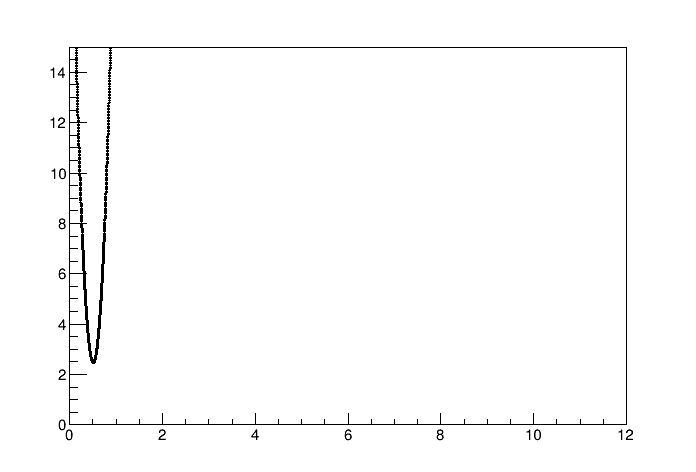

In [48]:
c2->Clear();
gchi2->GetXaxis()->SetLimits(0., 12);
gchi2->GetYaxis()->SetRangeUser(0 , 15.); 
gchi2->SetMarkerStyle(6);
gchi2->Draw("");
c2->SetLogy(0);
c2->Draw();

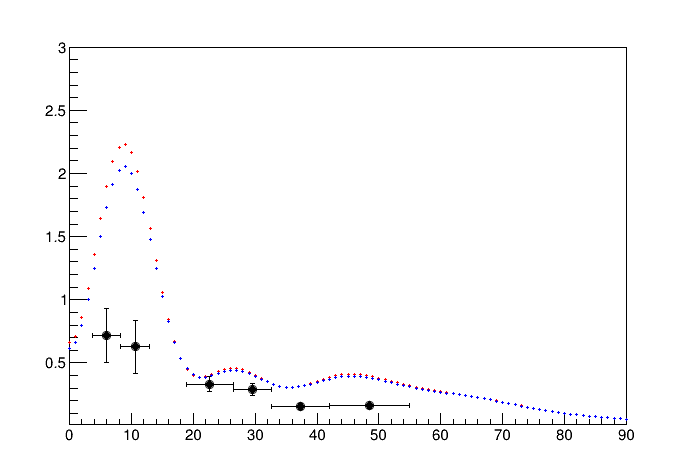

In [49]:
grate->GetXaxis()->SetLimits(0, 90);
grate->GetYaxis()->SetRangeUser(0.01 , 3); 
grate_mix->GetXaxis()->SetLimits(0, 120);
grate_mix->GetYaxis()->SetRangeUser(0 , 10); 

   c2->Clear();
   grate->SetMarkerStyle(6);
   grate->SetMarkerColor(2);
   grate_654->SetMarkerStyle(6);
   grate_654->SetMarkerColor(4);
   thecross_0->SetMarkerStyle(8);
   thecross_0->SetMarkerColor(1);

   grate->Draw("ap");
   thecross_0->Draw("samep");
   grate_654->Draw("samep");
   //grate_7000->Draw("samep");
   //thecross_0->Draw("samep");
   //thecross_7000->Draw("samep");
   c2->SetLogy(0);
   c2->Draw();

In [50]:
  TGraph *grate_mix_SF=new TGraph();
  TGraph *grate_mix_SF0=new TGraph();
  TGraph *grate_mix_SF1=new TGraph();
Int_t countgrate_mix_SF=0,countgrate_mix_SF0=0,countgrate_mix_SF1=0;
ifstream inra("/home/zhuhy/JNBook/Experiment2022/taf/else/txt/15C_d_3He_cm_0_Daehnick_GDP08.txt");
  if(inra.is_open()){
    while(!inra.eof())
    {
      inra>>temptheta>>temprate>>taa;
      grate_mix_SF ->SetPoint(countgrate_mix_SF++, temptheta,(0.5625*temprate+(1-0.5625)*grate_654->Eval(temptheta))*SF_0);
      //grate_mix_SF ->SetPoint(countgrate_mix_SF++, temptheta,(temprate+grate_654->Eval(temptheta))*SF_0);
      grate_mix_SF0->SetPoint(countgrate_mix_SF0++,temptheta,(0.5625*temprate)*SF_0);
      grate_mix_SF1->SetPoint(countgrate_mix_SF1++,temptheta,((1-0.5625)*grate_654->Eval(temptheta))*SF_0);
      //grate_mix_SF0->SetPoint(countgrate_mix_SF0++,temptheta,temprate*SF_0);
      //grate_mix_SF1->SetPoint(countgrate_mix_SF1++,temptheta,grate_654->Eval(temptheta)*SF_0);
      //cout<<therunnumber<<'\t'<<accpttedrate[therunnumber]<<'\n';
        //cout<<temptheta<<'\t'<<((1-0.5625)*grate_654->Eval(temptheta))*SF_0<<'\n';
    }
  }
  inra.close();


In [51]:
TCanvas *c4=new TCanvas("c4","c4",800,800);

input_line_134:2:11: error: redefinition of 'c4'
 TCanvas *c4=new TCanvas("c4","c4",800,800);
          ^
input_line_41:5:10: note: previous definition is here
TCanvas *c4=new TCanvas("c4","c4",1200,600);
         ^


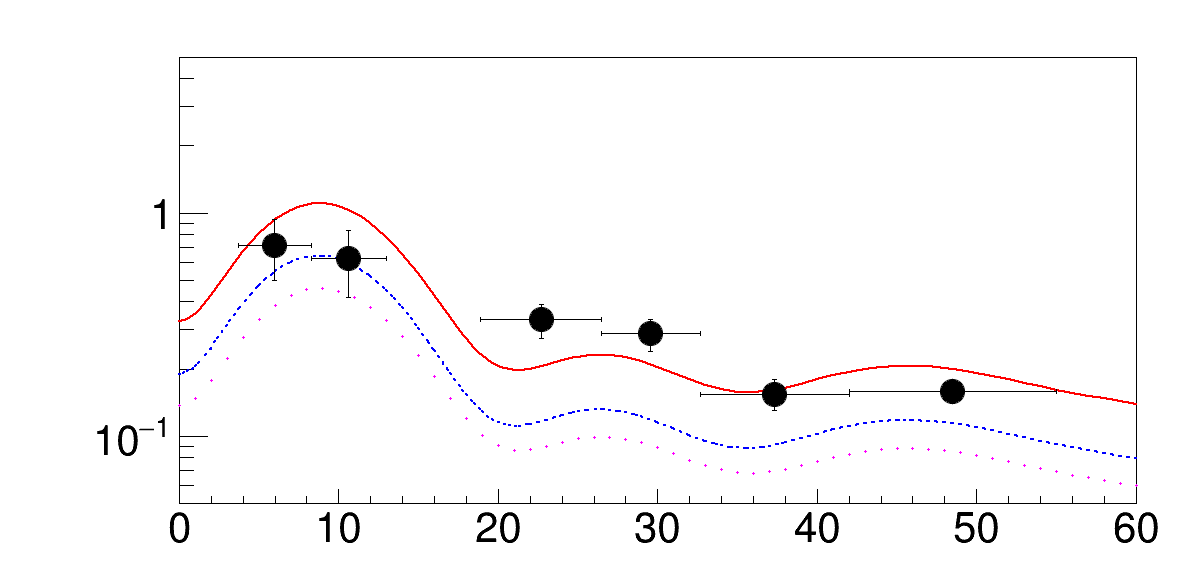

In [52]:
c4->SetLeftMargin(0.15);      // 增加左边距给Y轴标签留空间
c4->SetRightMargin(0.05);     // 适当右边距
c4->SetBottomMargin(0.12);    // 适当底部边距
grate_mix_SF->GetXaxis()->SetLabelSize(0.08);  // 放大X轴数字字体
grate_mix_SF->GetYaxis()->SetLabelSize(0.08);  // 可选：同时放大Y轴字体
grate_mix_SF->GetXaxis()->SetLimits(0, 60);
grate_mix_SF->GetYaxis()->SetRangeUser(0.05 , 5); 
grate_mix->GetXaxis()->SetLimits(0, 120);
grate_mix->GetYaxis()->SetRangeUser(0 , 10); 

   c4->Clear();
   grate_mix_SF->SetMarkerStyle(6);
   grate_mix_SF0->SetMarkerStyle(6);
   grate_mix_SF0->SetMarkerColor(4);
   grate_mix_SF1->SetMarkerStyle(6);
   grate_mix_SF1->SetMarkerColor(6);
   grate_654->SetMarkerStyle(6);
   grate_654->SetMarkerColor(4);
   thecross_0->SetMarkerStyle(8);
   thecross_0->SetMarkerColor(1);
   thecross_0->SetMarkerSize(3);

   grate_mix_SF->SetLineStyle(1);
   grate_mix_SF0->SetLineStyle(2);
   grate_mix_SF1->SetLineStyle(3);
   grate_mix_SF->SetLineWidth(2);
   grate_mix_SF0->SetLineWidth(2);
   grate_mix_SF1->SetLineWidth(2);
   grate_mix_SF->SetLineColor(2);
   grate_mix_SF0->SetLineColor(4);
   grate_mix_SF1->SetLineColor(6);

   grate_mix_SF->Draw("AC");
   grate_mix_SF0->Draw("C same");
   grate_mix_SF1->Draw("samep");
   thecross_0->Draw("samep");
   //grate_654->Draw("samep");
   //grate->Draw("samep");
   //grate_7000->Draw("samep");
   //thecross_654->Draw("samep");
   //thecross_7000->Draw("samep");
   c4->SetLogy(1);
   c4->Draw();

In [53]:
   c2->Clear();
   thecross_0->SetMarkerStyle(3);
   //thecross_0->Draw("ap");
   //c2->Draw();

In [54]:
   c2->Clear();
   thecross_0->SetMarkerStyle(3);
   //thecross_0->Draw("ap");
   //c2->Draw();

In [55]:
   c2->Clear();
   T1E_newtheta_new_bydstar_all->SetNameTitle("E_theta_lab exp","E_theta_lab exp");
   //T1E_newtheta_new_bydstar_all->Draw("ap");
   //c2->Draw();
   cout<<npoints_all<<'\n';

240


In [56]:
   c2->Clear();
  //h_E_exp_1->Draw();
   //c2->Draw();

In [57]:
   c2->Clear();
  // h_E_exp_2->Draw();
  // c2->Draw();

In [58]:
   c2->Clear();
   E_theta_cm_1->SetNameTitle("E_theta_cm g.s","E_theta_cm g.s");
 //  E_theta_cm_1->Draw("ap");
  // c2->Draw();
   cout<<thecount1<<'\n';

238


In [59]:
   c2->Clear();
  // h_E_theta_cm_1->Draw("colz");
  // c2->Draw();
   cout<<thecount1<<'\n';

238


In [60]:
   c2->Clear();
   E_theta_cm_2->SetNameTitle("E_theta_cm Ex","E_theta_cm Ex");
  // E_theta_cm_2->Draw("ap");
  // c2->Draw();
   cout<<thecount2<<'\n';

0


In [61]:
   c2->Clear();
  // h_E_theta_cm_2->Draw("colz");
  // c2->Draw();
   cout<<thecount2<<'\n';

0


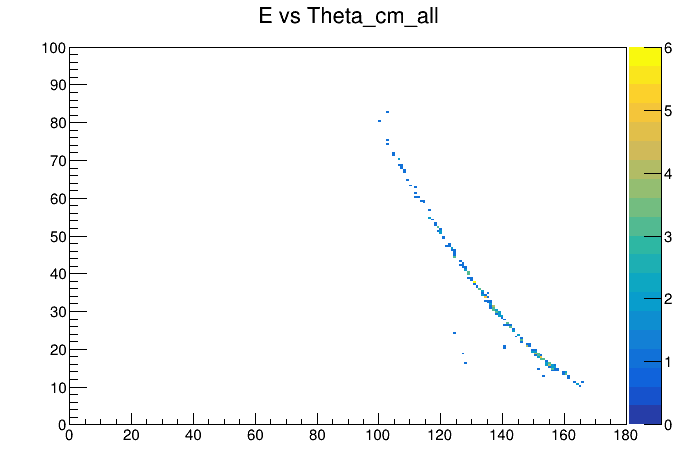

238


In [62]:
   c2->Clear();
   h_E_theta_cm_all->Draw("colz");
   c2->Draw();
   cout<<thecount1+thecount2<<'\n';

# 